<a href="https://colab.research.google.com/github/gsowndarya/Insurance/blob/main/health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library**

In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import RMSprop, Nadam, Adam
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import balanced_accuracy_score

import pickle
from tensorflow.keras.models import load_model

import warnings as wn
wn.filterwarnings(action='ignore')

# **Upload and load dataset**

In [ ]:
# upload the data

uploaded = files.upload()

Saving claim_base_data.csv to claim_base_data.csv
Saving insurance_class_reg_data.csv to insurance_class_reg_data.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'claim_base_data.csv' uploaded successfully!
Dataset 'insurance_class_reg_data.csv' uploaded successfully!


In [ ]:
df = dataframes["insurance_class_reg_data.csv"]

In [ ]:
df_1 = dataframes["claim_base_data.csv"]

# **Data Cleaning**

---



## **Classification & Regression**
Classification - Risk Classification (Multiclass: Low, Medium, High)

Regression - Claim Amount Prediction

In [ ]:
 data.head()

,claim_id,claim_date,customer_id,policy_id,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
0,CLM100000,2024-01-06,CUST101824,POL101824,35,Male,Auto,30612.28,4,1,0,1063.48,852.23,Low
1,CLM100001,2023-12-02,CUST100409,POL100409,40,Female,Life,72924.54,5,1,0,1107.59,2076.60,Low
2,CLM100002,2024-04-21,CUST104506,POL104506,24,Male,Auto,74624.77,4,0,0,1021.60,2505.86,Medium
3,CLM100003,2023-01-25,CUST104012,POL104012,65,Female,Life,40600.10,0,0,0,1033.50,1080.57,Low
4,CLM100004,2024-06-26,CUST103657,POL103657,22,Male,Health,66063.18,3,0,0,984.60,796.33,Low


In [ ]:
data.shape

(6000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              6000 non-null   object 
 3   policy_id                6000 non-null   object 
 4   customer_age             6000 non-null   int64  
 5   gender                   6000 non-null   object 
 6   policy_type              6000 non-null   object 
 7   monthly_income           6000 non-null   float64
 8   vehicle_or_property_age  6000 non-null   int64  
 9   claim_history            6000 non-null   int64  
 10  fraudulent_claim         6000 non-null   int64  
 11  premium_amount           6000 non-null   float64
 12  claim_amount             6000 non-null   float64
 13  risk_score               6000 non-null   object 
dtypes: float64(3), int64(4),

In [ ]:
data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
data.columns

Index(['claim_id', 'claim_date', 'customer_id', 'policy_id', 'customer_age',
       'gender', 'policy_type', 'monthly_income', 'vehicle_or_property_age',
       'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount',
       'risk_score'],
      dtype='object')

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.isnull().sum()

,0
claim_id,0
claim_date,0
customer_id,0
policy_id,0
customer_age,0
gender,0
policy_type,0
monthly_income,0
vehicle_or_property_age,0
claim_history,0


In [ ]:
data.describe(include="all")

,claim_id,claim_date,customer_id,policy_id,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
count,6000,6000,6000,6000,6000.000000,6000,6000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000
unique,6000,729,4516,4516,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,3
top,CLM105983,2023-07-11,CUST104067,POL104067,NaN,Female,Property,NaN,NaN,NaN,NaN,NaN,NaN,Low
freq,1,18,5,5,NaN,2885,1573,NaN,NaN,NaN,NaN,NaN,NaN,3708
mean,NaN,NaN,NaN,NaN,39.630500,NaN,NaN,60214.931653,4.524000,1.190167,0.209000,1138.094827,1991.198582,NaN
std,NaN,NaN,NaN,NaN,11.907208,NaN,NaN,15574.196418,1.995266,1.079906,0.406628,122.630250,858.031337,NaN
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,5000.000000,0.000000,0.000000,0.000000,845.180000,476.790000,NaN
25%,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,49279.200000,3.000000,0.000000,0.000000,1048.815000,1263.722500,NaN
50%,NaN,NaN,NaN,NaN,39.000000,NaN,NaN,60159.575000,5.000000,1.000000,0.000000,1123.195000,2000.060000,NaN
75%,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,70663.630000,6.000000,2.000000,0.000000,1212.325000,2652.015000,NaN


In [ ]:
assert pd.notnull(data).all().all()

In [ ]:
assert pd.notnull(data.select_dtypes(include=["number"])).all().all()

In [ ]:
data.head()

,claim_id,claim_date,customer_id,policy_id,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
0,CLM100000,2024-01-06,CUST101824,POL101824,35,Male,Auto,30612.28,4,1,0,1063.48,852.23,Low
1,CLM100001,2023-12-02,CUST100409,POL100409,40,Female,Life,72924.54,5,1,0,1107.59,2076.60,Low
2,CLM100002,2024-04-21,CUST104506,POL104506,24,Male,Auto,74624.77,4,0,0,1021.60,2505.86,Medium
3,CLM100003,2023-01-25,CUST104012,POL104012,65,Female,Life,40600.10,0,0,0,1033.50,1080.57,Low
4,CLM100004,2024-06-26,CUST103657,POL103657,22,Male,Health,66063.18,3,0,0,984.60,796.33,Low


In [ ]:
data.tail()

,claim_id,claim_date,customer_id,policy_id,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
5995,CLM105995,2023-02-26,CUST104146,POL104146,45,Male,Health,46044.35,4,0,0,1065.08,798.81,Low
5996,CLM105996,2024-10-14,CUST100200,POL100200,34,Female,Health,74890.33,6,1,0,1070.09,884.54,Low
5997,CLM105997,2024-03-11,CUST107514,POL107514,20,Male,Health,55325.67,3,2,0,1225.68,1682.61,Low
5998,CLM105998,2024-11-20,CUST108153,POL108153,39,Female,Life,79937.13,4,1,0,1123.84,2111.32,Low
5999,CLM105999,2024-03-12,CUST108169,POL108169,55,Other,Auto,59457.29,2,1,0,1190.99,3323.62,Medium


In [ ]:
data.shape

(6000, 14)

## **Classification**
Classification - Fraudulent Claim (1 = Fraud, 0 = Genuine)

In [ ]:
df.head()

,Customer_ID,Policy_ID,Customer_Age,Gender,Policy_Type,Monthly_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,CUST100000,POL100000,45,Female,Auto,57926.04,6,0,0,1100.36,719.87,Low
1,CUST100001,POL100001,52,Male,Auto,51286.83,3,0,0,891.98,1147.47,Low
2,CUST100002,POL100002,27,Female,Health,64713.71,3,2,0,1127.81,2247.89,Low
3,CUST100003,POL100003,33,Male,Health,50996.19,6,0,0,964.58,1662.83,Low
4,CUST100004,POL100004,49,Female,Property,41687.35,5,1,1,1014.32,2564.04,High


In [ ]:
df_1.head()

,Claim_ID,Policyholder_ID,Claim_Date
0,CLM100000,CUST101824,2024-01-06
1,CLM100001,CUST100409,2023-12-02
2,CLM100002,CUST104506,2024-04-21
3,CLM100003,CUST104012,2023-01-25
4,CLM100004,CUST103657,2024-06-26


In [ ]:
df.shape

(10000, 12)

In [ ]:
df_1.shape

(6000, 3)

In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['customer_id', 'policy_id', 'customer_age', 'gender', 'policy_type',
       'monthly_income', 'vehicle_or_property_age', 'claim_history',
       'fraudulent_claim', 'premium_amount', 'claim_amount', 'risk_score'],
      dtype='object')

In [ ]:
df_1.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_1.columns

Index(['claim_id', 'policyholder_id', 'claim_date'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              10000 non-null  object 
 1   policy_id                10000 non-null  object 
 2   customer_age             10000 non-null  int64  
 3   gender                   10000 non-null  object 
 4   policy_type              10000 non-null  object 
 5   monthly_income           10000 non-null  float64
 6   vehicle_or_property_age  10000 non-null  int64  
 7   claim_history            10000 non-null  int64  
 8   fraudulent_claim         10000 non-null  int64  
 9   premium_amount           10000 non-null  float64
 10  claim_amount             10000 non-null  float64
 11  risk_score               10000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 937.6+ KB


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   claim_id         6000 non-null   object
 1   policyholder_id  6000 non-null   object
 2   claim_date       6000 non-null   object
dtypes: object(3)
memory usage: 140.8+ KB


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df_1.duplicated().sum())

0


In [ ]:
df.isnull().sum()

,0
customer_id,0
policy_id,0
customer_age,0
gender,0
policy_type,0
monthly_income,0
vehicle_or_property_age,0
claim_history,0
fraudulent_claim,0
premium_amount,0


In [ ]:
df_1.isnull().sum()

,0
claim_id,0
policyholder_id,0
claim_date,0


In [ ]:
print("df columns:", df.columns.tolist())
print("df_1 columns:", df_1.columns.tolist())

df columns: ['customer_id', 'policy_id', 'customer_age', 'gender', 'policy_type', 'monthly_income', 'vehicle_or_property_age', 'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount', 'risk_score']
df_1 columns: ['claim_id', 'policyholder_id', 'claim_date']


In [ ]:
df_combined=pd.merge(df_1,df, left_on="policyholder_id", right_on="customer_id", how="right")
df_combined.drop(columns=["policyholder_id"], inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11484 entries, 0 to 11483
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              11484 non-null  object 
 3   policy_id                11484 non-null  object 
 4   customer_age             11484 non-null  int64  
 5   gender                   11484 non-null  object 
 6   policy_type              11484 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  11484 non-null  int64  
 9   claim_history            11484 non-null  int64  
 10  fraudulent_claim         11484 non-null  int64  
 11  premium_amount           11484 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
dtypes: float64(3), int64(4

In [ ]:
df_combined.to_csv("insurance.csv", index=False)

In [ ]:
files.download('insurance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_combined['customer_id'].value_counts()

,count
customer_id,
CUST104067,5
CUST109383,5
CUST109977,5
CUST106939,5
CUST106609,5
...,...
CUST103527,1
CUST103528,1
CUST103529,1


In [ ]:
data=pd.merge(df_1,df, left_on="policyholder_id", right_on="customer_id", how="left")
data.drop(columns=["policyholder_id"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              6000 non-null   object 
 3   policy_id                6000 non-null   object 
 4   customer_age             6000 non-null   int64  
 5   gender                   6000 non-null   object 
 6   policy_type              6000 non-null   object 
 7   monthly_income           6000 non-null   float64
 8   vehicle_or_property_age  6000 non-null   int64  
 9   claim_history            6000 non-null   int64  
 10  fraudulent_claim         6000 non-null   int64  
 11  premium_amount           6000 non-null   float64
 12  claim_amount             6000 non-null   float64
 13  risk_score               6000 non-null   object 
dtypes: float64(3), int64(4),

In [ ]:
data.head()

,claim_id,claim_date,customer_id,policy_id,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
0,CLM100000,2024-01-06,CUST101824,POL101824,35,Male,Auto,30612.28,4,1,0,1063.48,852.23,Low
1,CLM100001,2023-12-02,CUST100409,POL100409,40,Female,Life,72924.54,5,1,0,1107.59,2076.60,Low
2,CLM100002,2024-04-21,CUST104506,POL104506,24,Male,Auto,74624.77,4,0,0,1021.60,2505.86,Medium
3,CLM100003,2023-01-25,CUST104012,POL104012,65,Female,Life,40600.10,0,0,0,1033.50,1080.57,Low
4,CLM100004,2024-06-26,CUST103657,POL103657,22,Male,Health,66063.18,3,0,0,984.60,796.33,Low


In [ ]:
data.shape

(6000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              6000 non-null   object 
 3   policy_id                6000 non-null   object 
 4   customer_age             6000 non-null   int64  
 5   gender                   6000 non-null   object 
 6   policy_type              6000 non-null   object 
 7   monthly_income           6000 non-null   float64
 8   vehicle_or_property_age  6000 non-null   int64  
 9   claim_history            6000 non-null   int64  
 10  fraudulent_claim         6000 non-null   int64  
 11  premium_amount           6000 non-null   float64
 12  claim_amount             6000 non-null   float64
 13  risk_score               6000 non-null   object 
dtypes: float64(3), int64(4),

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.isnull().sum()

,0
claim_id,0
claim_date,0
customer_id,0
policy_id,0
customer_age,0
gender,0
policy_type,0
monthly_income,0
vehicle_or_property_age,0
claim_history,0


In [ ]:
data.describe(include="all")

,claim_id,claim_date,customer_id,policy_id,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
count,6000,6000,6000,6000,6000.000000,6000,6000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000
unique,6000,729,4516,4516,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,3
top,CLM105983,2023-07-11,CUST104067,POL104067,NaN,Female,Property,NaN,NaN,NaN,NaN,NaN,NaN,Low
freq,1,18,5,5,NaN,2885,1573,NaN,NaN,NaN,NaN,NaN,NaN,3708
mean,NaN,NaN,NaN,NaN,39.630500,NaN,NaN,60214.931653,4.524000,1.190167,0.209000,1138.094827,1991.198582,NaN
std,NaN,NaN,NaN,NaN,11.907208,NaN,NaN,15574.196418,1.995266,1.079906,0.406628,122.630250,858.031337,NaN
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,5000.000000,0.000000,0.000000,0.000000,845.180000,476.790000,NaN
25%,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,49279.200000,3.000000,0.000000,0.000000,1048.815000,1263.722500,NaN
50%,NaN,NaN,NaN,NaN,39.000000,NaN,NaN,60159.575000,5.000000,1.000000,0.000000,1123.195000,2000.060000,NaN
75%,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,70663.630000,6.000000,2.000000,0.000000,1212.325000,2652.015000,NaN


In [ ]:
assert pd.notnull(data).all().all()

In [ ]:
assert pd.notnull(data.select_dtypes(include=["number"])).all().all()

# **Data preprocessing**

---



## **Classification & Regression**
 Classification - Risk Classification (Multiclass: Low, Medium, High)

 Regression - Claim Amount Prediction

In [ ]:
df = data.drop(columns=['customer_id', 'policy_id'])
df.head()

,claim_id,claim_date,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
0,CLM100000,2024-01-06,35,Male,Auto,30612.28,4,1,0,1063.48,852.23,Low
1,CLM100001,2023-12-02,40,Female,Life,72924.54,5,1,0,1107.59,2076.60,Low
2,CLM100002,2024-04-21,24,Male,Auto,74624.77,4,0,0,1021.60,2505.86,Medium
3,CLM100003,2023-01-25,65,Female,Life,40600.10,0,0,0,1033.50,1080.57,Low
4,CLM100004,2024-06-26,22,Male,Health,66063.18,3,0,0,984.60,796.33,Low


In [ ]:
df.shape

(6000, 12)

In [ ]:
df['vehicle_or_property_age'].value_counts()

,count
vehicle_or_property_age,
5,1152
4,1131
6,939
3,893
7,563
2,521
1,266
8,258
0,144


In [ ]:
df[(df['vehicle_or_property_age']==12) | (df['vehicle_or_property_age']==11)]

,claim_id,claim_date,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
68,CLM100068,2024-06-08,35,Male,Property,19341.50,12,0,0,1024.74,1669.02,Medium
106,CLM100106,2023-06-07,29,Female,Health,47174.78,11,1,1,1067.60,1309.94,Medium
483,CLM100483,2024-02-28,22,Female,Auto,54403.08,11,1,0,1172.92,666.12,Low
1409,CLM101409,2024-01-25,22,Female,Auto,54403.08,11,1,0,1172.92,666.12,Low
2963,CLM102963,2023-02-14,51,Male,Auto,77991.39,11,0,0,1008.60,2821.00,Medium
3456,CLM103456,2024-12-06,46,Male,Property,62271.78,11,2,1,1305.87,1300.39,Medium
3727,CLM103727,2023-11-05,46,Female,Auto,39304.77,11,0,0,1037.86,1114.50,Low
3914,CLM103914,2024-04-25,45,Female,Auto,72456.15,11,3,0,1248.80,3812.71,High


In [ ]:
df['claim_history'].value_counts()

,count
claim_history,
1,2171
0,1809
2,1325
3,510
4,145
5,32
6,6
7,2


In [ ]:
df[(df['claim_history']==7) | (df['claim_history']==6)]

,claim_id,claim_date,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
1332,CLM101332,2024-09-02,61,Female,Health,92908.91,6,6,0,1609.27,2865.83,Medium
1860,CLM101860,2023-09-14,61,Female,Health,92908.91,6,6,0,1609.27,2865.83,Medium
1992,CLM101992,2024-01-31,61,Female,Health,92908.91,6,6,0,1609.27,2865.83,Medium
2580,CLM102580,2024-01-09,38,Male,Property,49574.35,4,6,0,1565.40,1293.87,Medium
2597,CLM102597,2024-07-31,18,Male,Property,56252.07,4,7,0,1838.37,2999.94,High
3421,CLM103421,2023-12-26,45,Male,Life,62003.90,6,6,0,1619.12,1368.77,Low
5548,CLM105548,2024-09-07,26,Male,Property,58830.44,4,6,0,1543.91,1291.58,Medium
5650,CLM105650,2023-10-03,18,Male,Property,56252.07,4,7,0,1838.37,2999.94,High


In [ ]:
df["policy_type"].value_counts()

,count
policy_type,
Property,1573
Life,1503
Auto,1481
Health,1443


In [ ]:
# Target - 1
df["risk_score"].value_counts()

,count
risk_score,
Low,3708
Medium,1906
High,386


In [ ]:
# Target - 2
df['fraudulent_claim'].value_counts()  # 0 - NO, 1 - Yes

,count
fraudulent_claim,
0,4746
1,1254


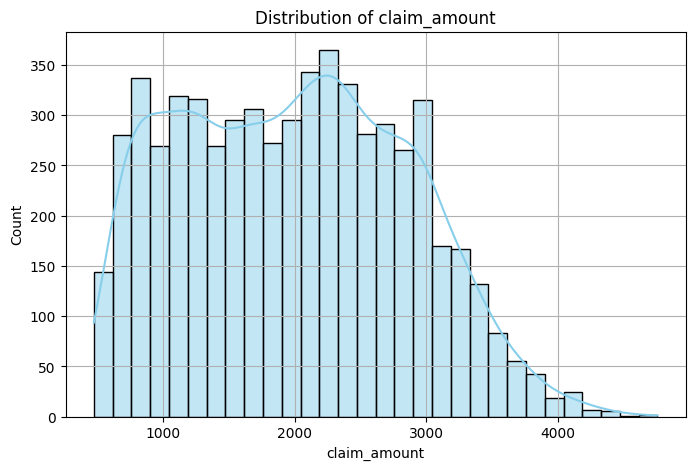

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["claim_amount"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of claim_amount")
plt.xlabel("claim_amount")
plt.ylabel('Count')
plt.grid(True)
plt.show()

The distribution is right-skewed (positively skewed) — there are many lower/mid-range claims and few high claim amounts.

Data is dense between 800 and 3000.
It resembles a log-normal distribution.

## **Classification**
Classification - Fraudulent Claim (1 = Fraud, 0 = Genuine)

In [ ]:
data.drop(columns=['customer_id', 'policy_id','claim_id', 'claim_date'], inplace=True)
data.head()

,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
0,35,Male,Auto,30612.28,4,1,0,1063.48,852.23,Low
1,40,Female,Life,72924.54,5,1,0,1107.59,2076.60,Low
2,24,Male,Auto,74624.77,4,0,0,1021.60,2505.86,Medium
3,65,Female,Life,40600.10,0,0,0,1033.50,1080.57,Low
4,22,Male,Health,66063.18,3,0,0,984.60,796.33,Low


In [ ]:
data.shape

(6000, 10)

In [ ]:
# Target-2
data['fraudulent_claim'].value_counts()

,count
fraudulent_claim,
0,4746
1,1254


<Axes: title={'center': 'Monthly Claim Counts'}, xlabel='Month'>

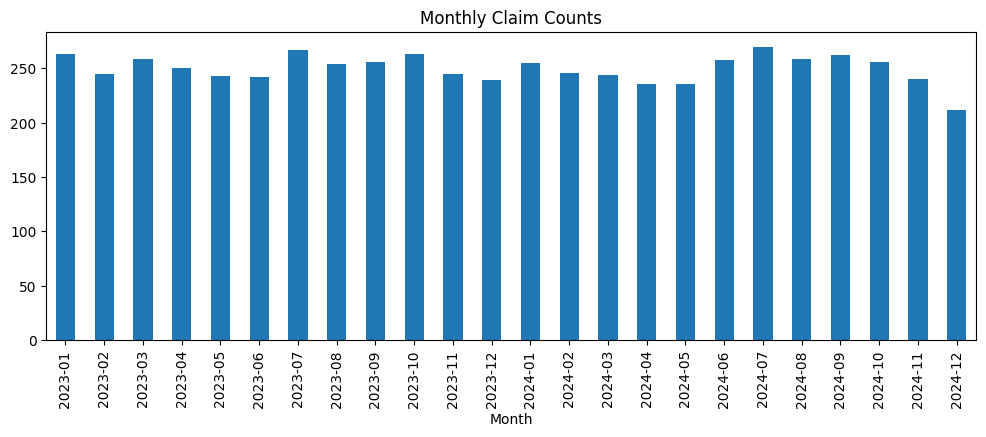

In [ ]:
df_1['claim_date'] = pd.to_datetime(df_1['claim_date'])
df_1['Month'] = df_1['claim_date'].dt.to_period('M')

monthly_counts = df_1.groupby('Month').size()

monthly_counts.plot(kind='bar', figsize=(12, 4), title='Monthly Claim Counts')

# **EDA**


---



## **Classification & Regression**
Classification - Risk Classification (Multiclass: Low, Medium, High)

Classification - Fraudulent Claim (# 0 - NO, 1 - Yes)

Regression - Claim Amount Prediction

### **Univariate analysis**

<Axes: title={'center': 'Monthly Claim Counts'}, xlabel='Month'>

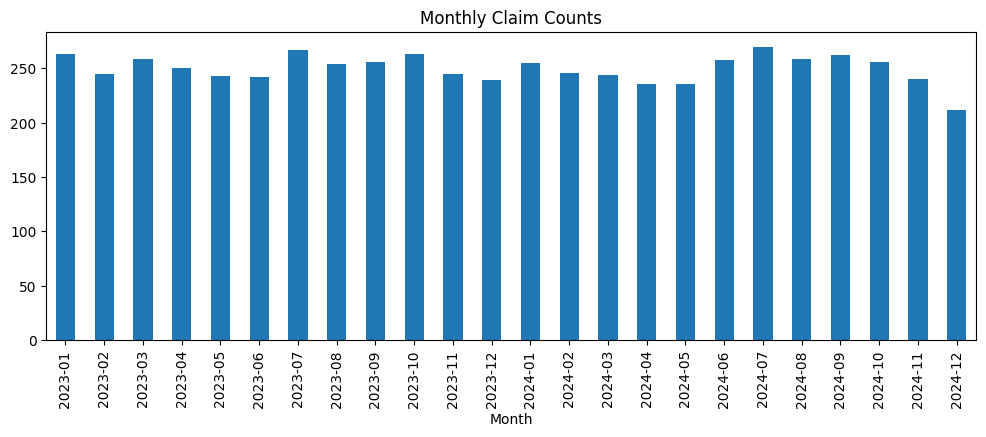

In [ ]:
df_1['claim_date'] = pd.to_datetime(df_1['claim_date'])
df_1['Month'] = df_1['claim_date'].dt.to_period('M')

monthly_counts = df_1.groupby('Month').size()

monthly_counts.plot(kind='bar', figsize=(12, 4), title='Monthly Claim Counts')

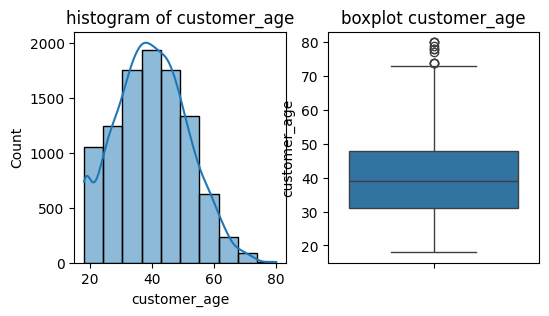

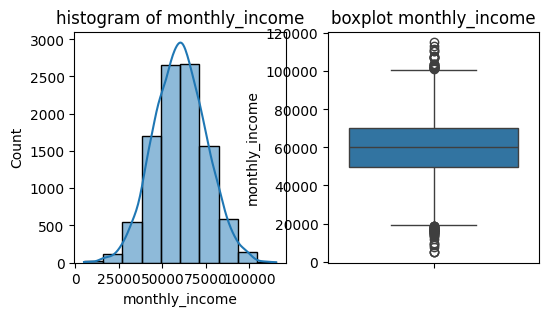

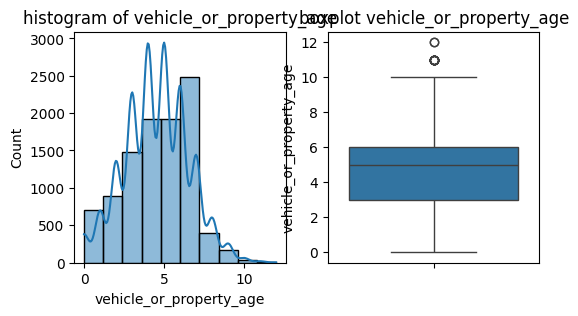

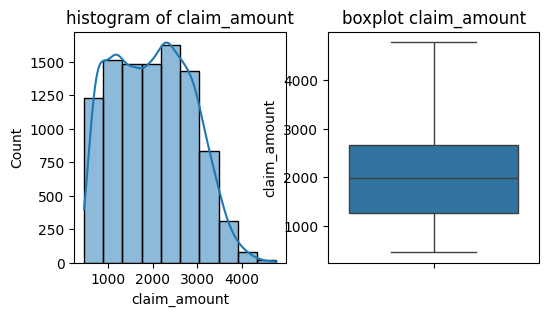

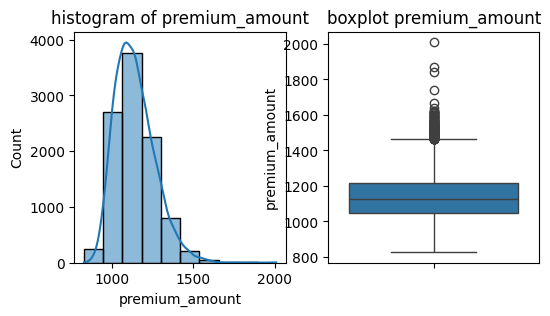

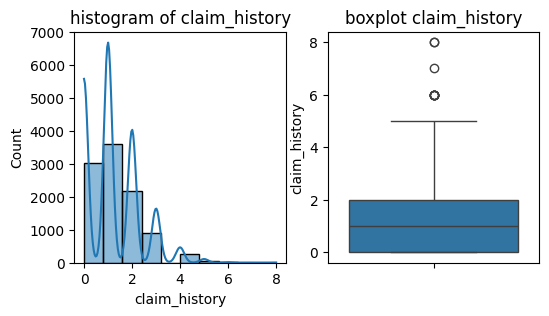

In [ ]:
num_cols = ['customer_age', 'monthly_income', 'vehicle_or_property_age', 'claim_amount', 'premium_amount', 'claim_history']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f"boxplot {col}")
    plt.show()

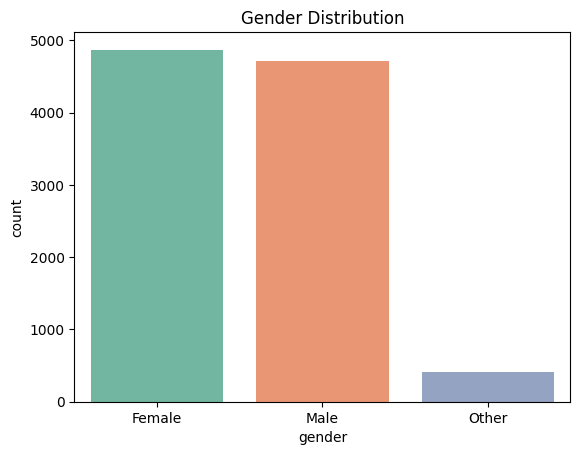

In [ ]:
# Gender Distribution
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

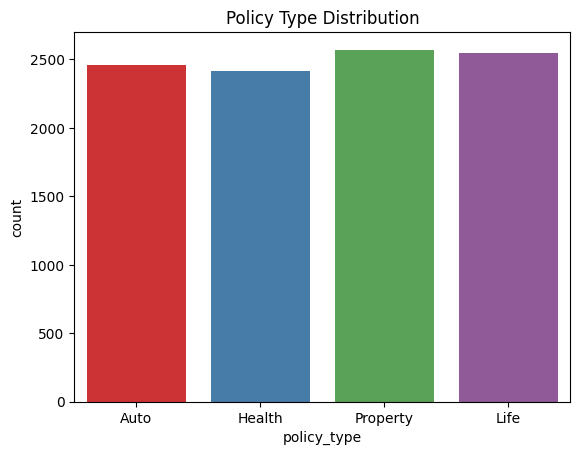

In [ ]:
# Policy Type Distribution
sns.countplot(data=df, x='policy_type', palette='Set1')
plt.title("Policy Type Distribution")
plt.show()

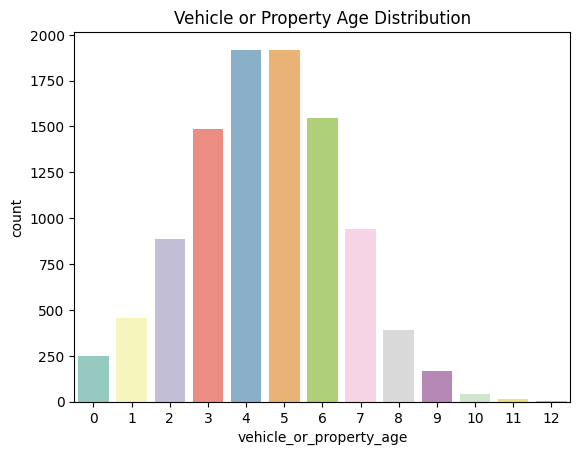

In [ ]:
# Vehicle or Property Age Distribution
sns.countplot(data=df, x='vehicle_or_property_age', palette='Set3')
plt.title("Vehicle or Property Age Distribution")
plt.show()

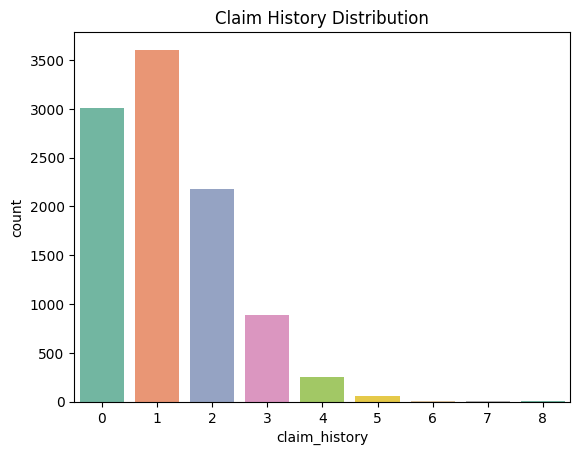

In [ ]:
# Claim History Distribution
sns.countplot(data=df, x='claim_history', palette='Set2')
plt.title("Claim History Distribution")
plt.show()

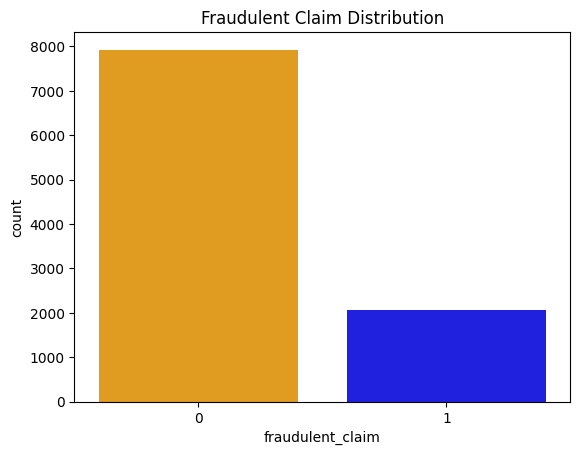

In [ ]:
# Fraudulent Claim Distribution

custom_palette = ['orange', 'blue']
sns.countplot(data=df, x='fraudulent_claim', palette=custom_palette)
plt.title("Fraudulent Claim Distribution")
plt.show()

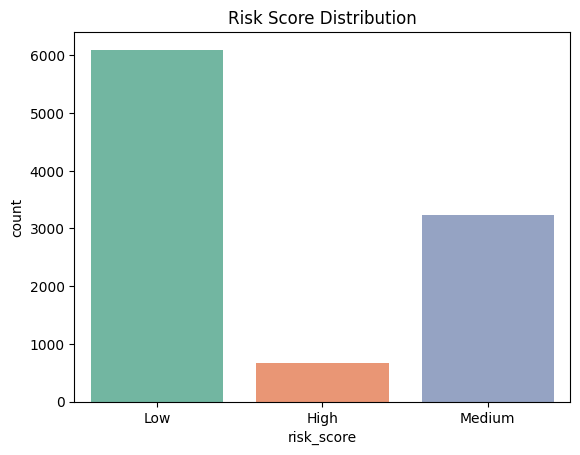

In [ ]:
# Risk Score Distribution
sns.countplot(data=df, x='risk_score', palette='Set2')
plt.title("Risk Score Distribution")
plt.show()

### **Bivariate analysis**

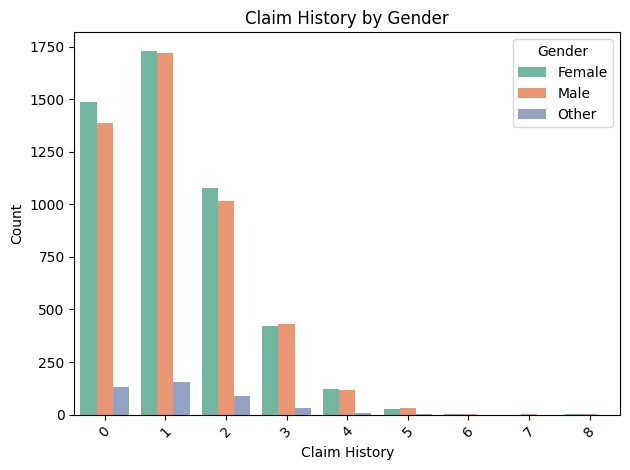

In [ ]:
sns.countplot(data=df, x='claim_history', hue='gender', palette='Set2')
plt.title("Claim History by Gender")
plt.xlabel("Claim History")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

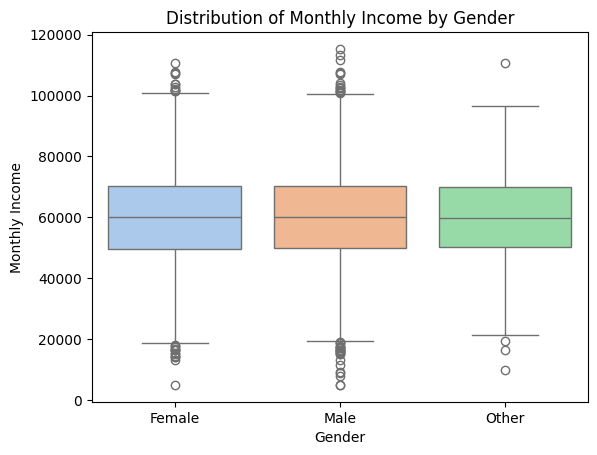

In [ ]:
sns.boxplot(x='gender', y='monthly_income', data=df, palette='pastel')
plt.title("Distribution of Monthly Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Monthly Income")
plt.show()

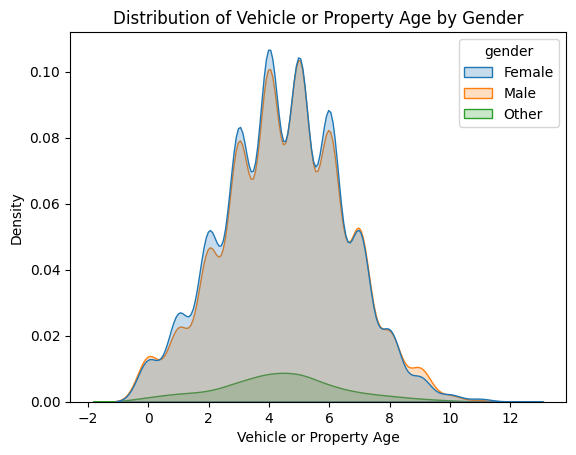

In [ ]:
sns.kdeplot(data=df, x='vehicle_or_property_age', hue='gender', fill=True)
plt.title("Distribution of Vehicle or Property Age by Gender")
plt.xlabel("Vehicle or Property Age")
plt.show()

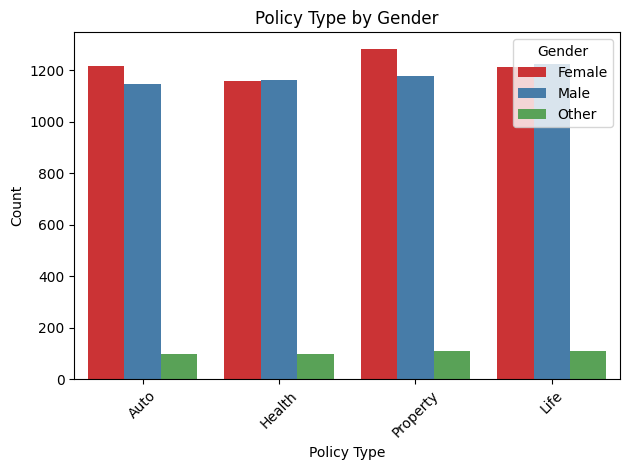

In [ ]:
sns.countplot(data=df, x='policy_type', hue='gender', palette='Set1')
plt.title("Policy Type by Gender")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

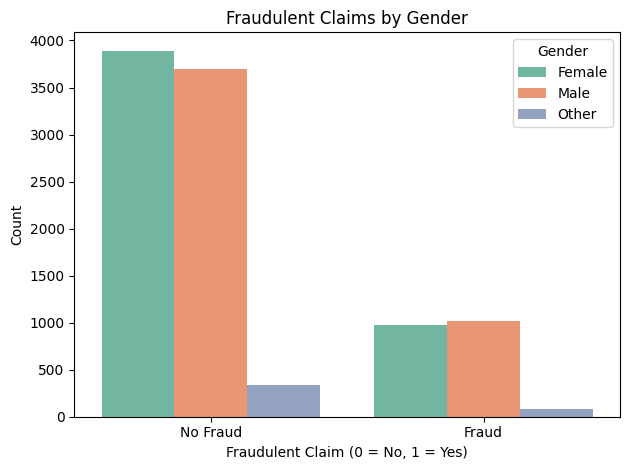

In [ ]:
sns.countplot(data=df, x='fraudulent_claim', hue='gender', palette='Set2')
plt.title("Fraudulent Claims by Gender")
plt.xlabel("Fraudulent Claim (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

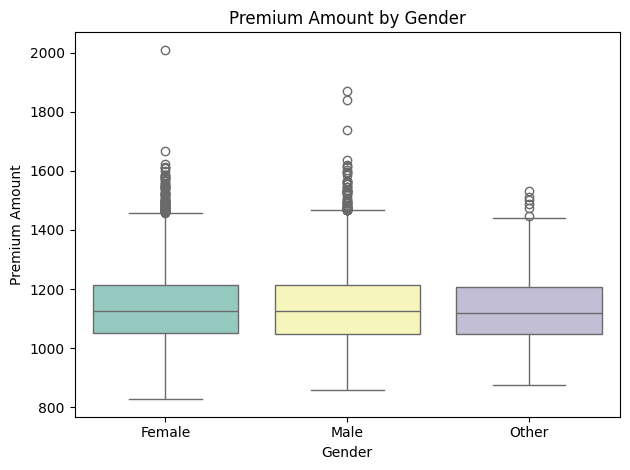

In [ ]:
sns.boxplot(data=df, x='gender', y='premium_amount', palette='Set3')
plt.title("Premium Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Premium Amount")
plt.tight_layout()
plt.show()

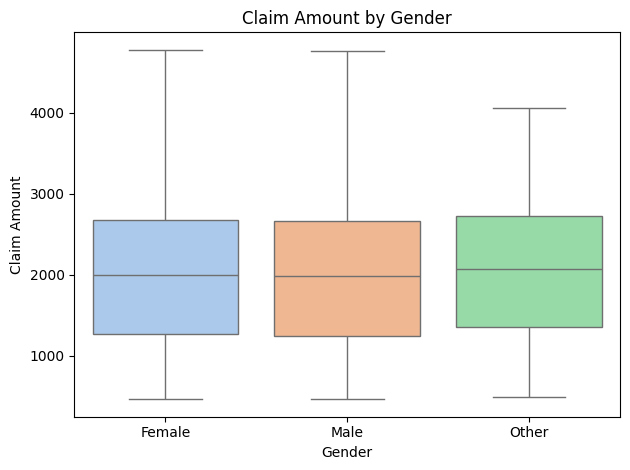

In [ ]:
sns.boxplot(data=df, x='gender', y='claim_amount', palette='pastel')
plt.title("Claim Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Claim Amount")
plt.tight_layout()
plt.show()

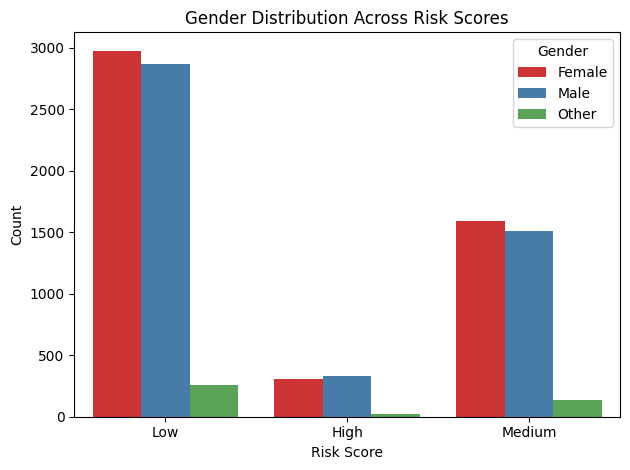

In [ ]:
sns.countplot(data=df, x='risk_score', hue='gender', palette='Set1')
plt.title("Gender Distribution Across Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

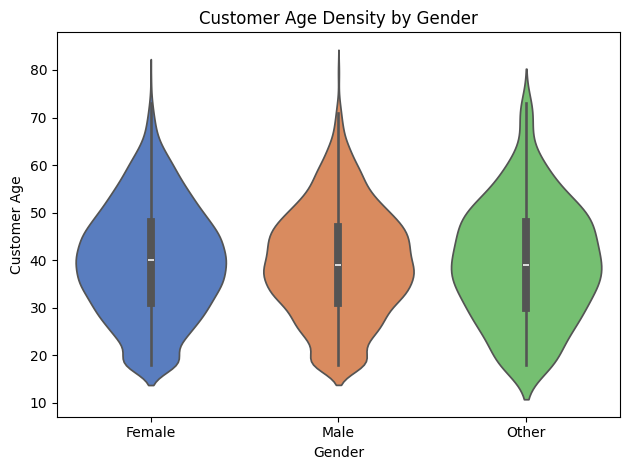

In [ ]:
sns.violinplot(data=df, x='gender', y='customer_age', palette='muted')
plt.title("Customer Age Density by Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Age")
plt.tight_layout()
plt.show()

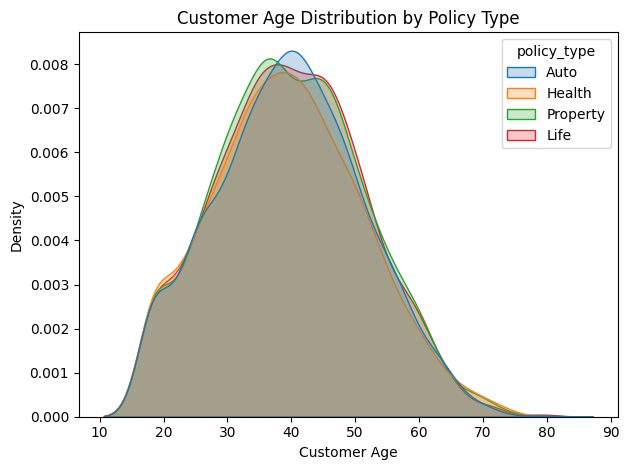

In [ ]:
sns.kdeplot(data=df, x='customer_age', hue='policy_type', fill=True)
plt.title("Customer Age Distribution by Policy Type")
plt.xlabel("Customer Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

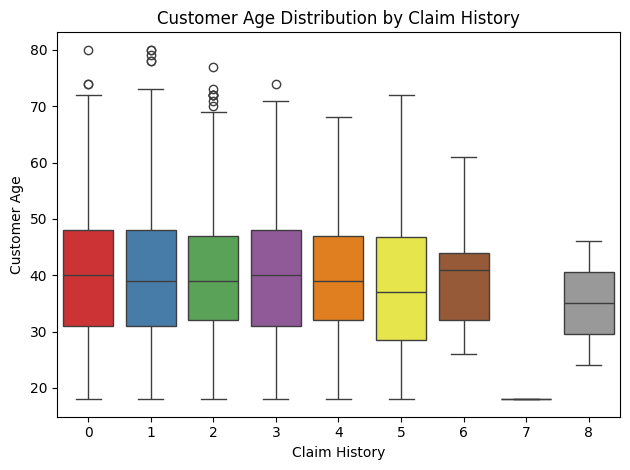

In [ ]:
sns.boxplot(data=df, x='claim_history', y='customer_age', palette='Set1')
plt.title("Customer Age Distribution by Claim History")
plt.xlabel("Claim History")
plt.ylabel("Customer Age")
plt.tight_layout()
plt.show()

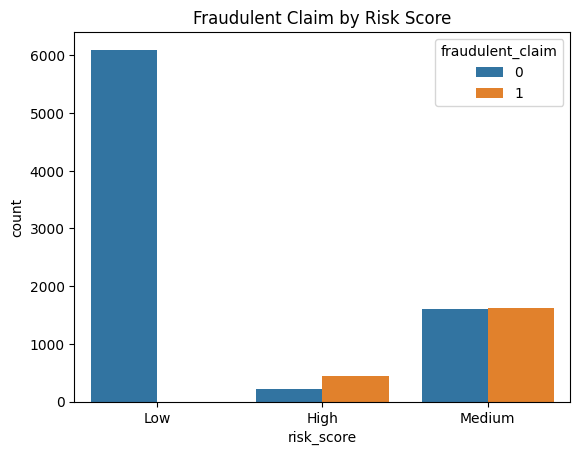

In [ ]:
# Risk Score vs Fraud
df1 = df[['risk_score','fraudulent_claim']].copy()
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

sns.countplot(data=df1, x='risk_score', hue='fraudulent_claim')
plt.title('Fraudulent Claim by Risk Score')
plt.show()

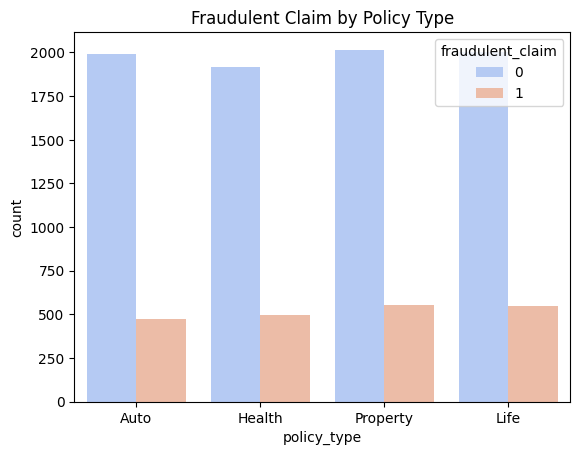

In [ ]:
# Fraud vs Policy Type
df1 = df[['fraudulent_claim', 'policy_type']].copy()
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

# Plot
sns.countplot(data=df1, x='policy_type', hue='fraudulent_claim', palette='coolwarm')
plt.title('Fraudulent Claim by Policy Type')
plt.show()

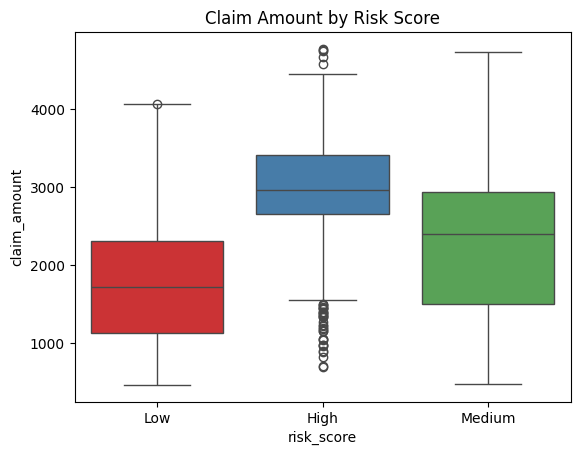

In [ ]:
sns.boxplot(data=df, x='risk_score', y='claim_amount', palette='Set1')
plt.title("Claim Amount by Risk Score")
plt.show()

### **Multivariate analysis**

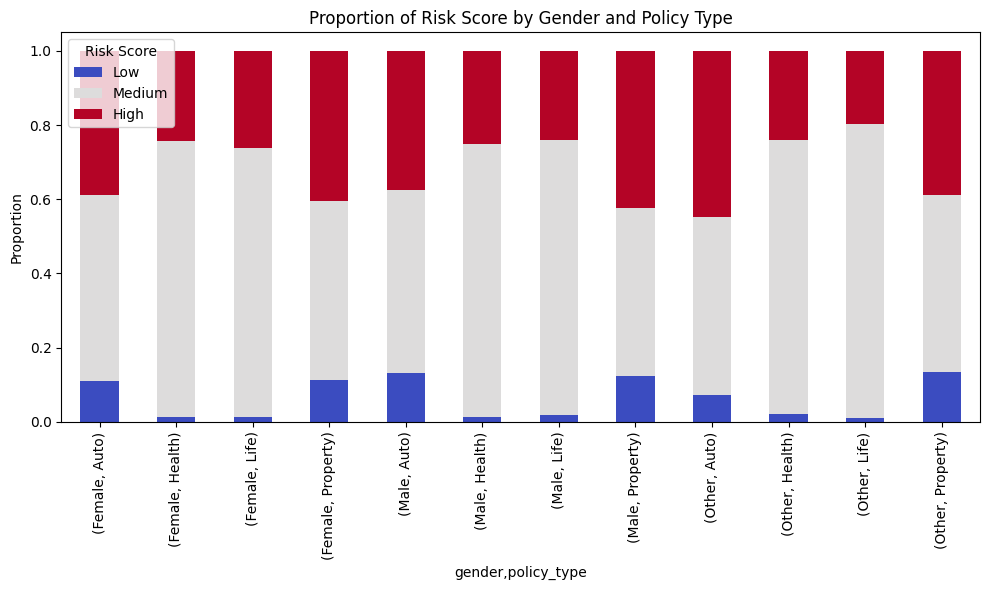

In [ ]:
grouped = df.groupby(['gender', 'policy_type', 'risk_score']).size().reset_index(name='count')

# Pivot for stacked plot
pivot_df = grouped.pivot_table(index=['gender', 'policy_type'], columns='risk_score', values='count', fill_value=0)
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plot
pivot_df_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Proportion of Risk Score by Gender and Policy Type')
plt.ylabel('Proportion')
plt.legend(title='Risk Score', labels=['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()

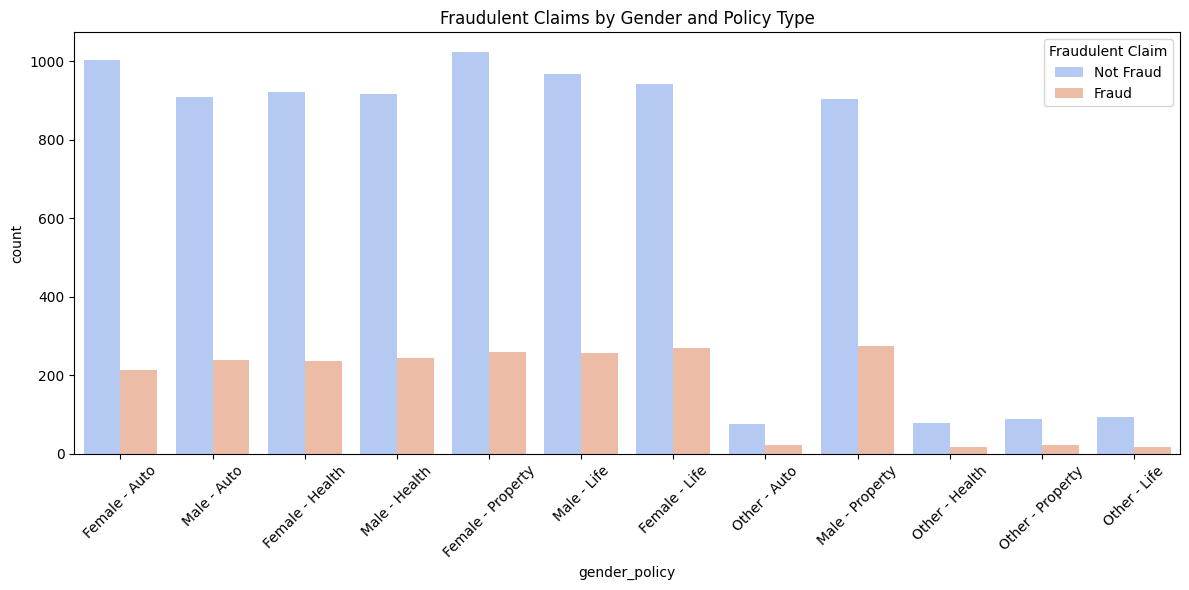

In [ ]:
# Create a combined column for gender & policy type
df1['gender_policy'] = df['gender'] + " - " + df['policy_type']
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='gender_policy', hue='fraudulent_claim', palette='coolwarm')
plt.title('Fraudulent Claims by Gender and Policy Type')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Claim', labels=['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

### **Outlayers**

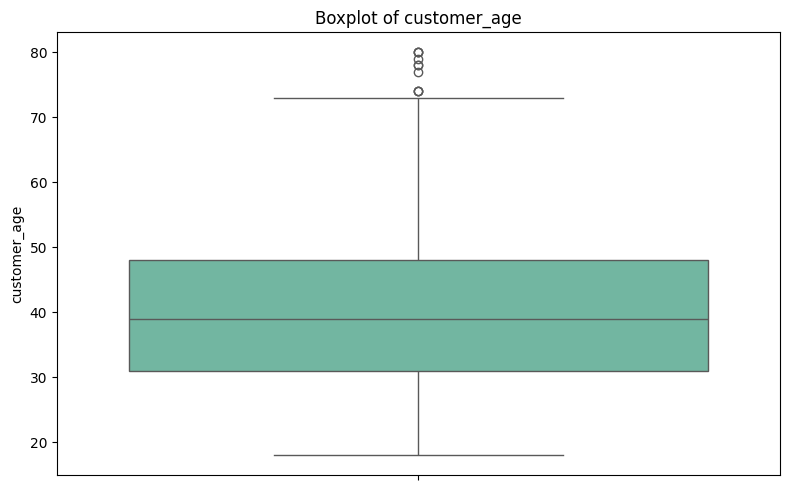

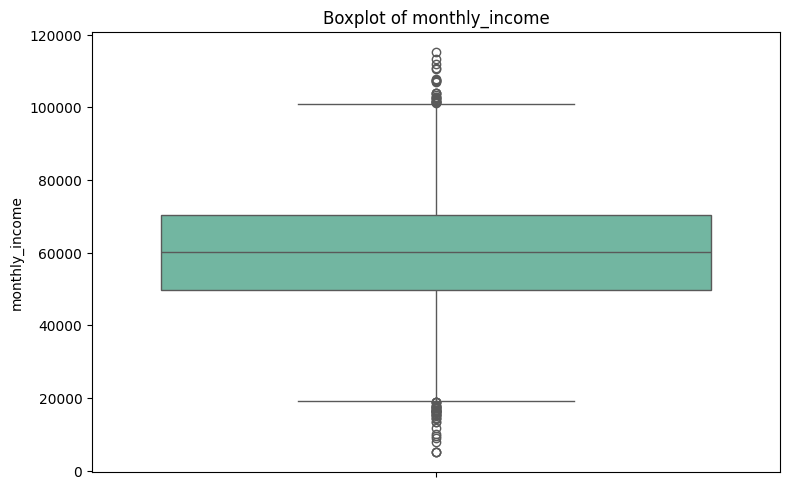

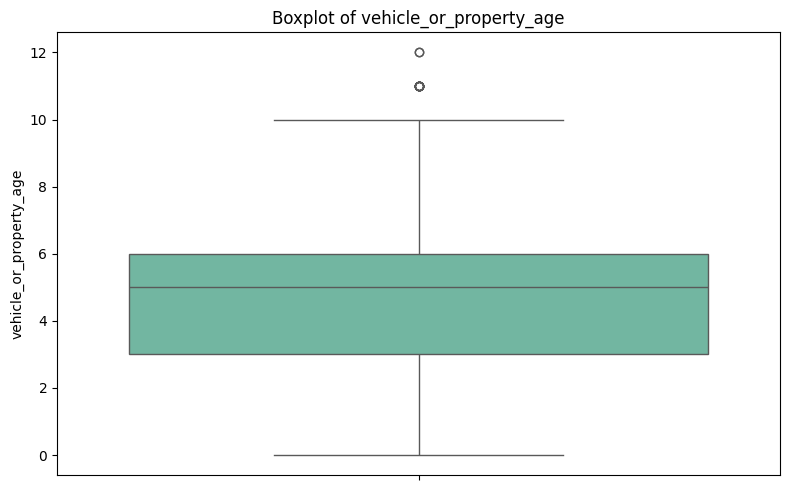

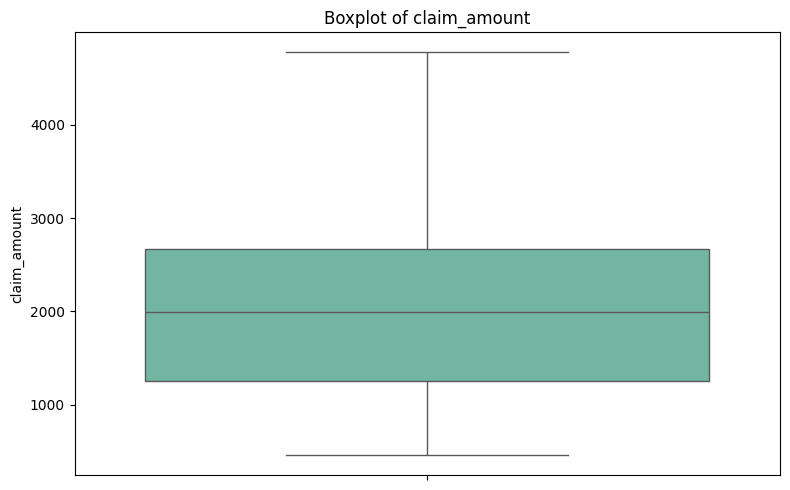

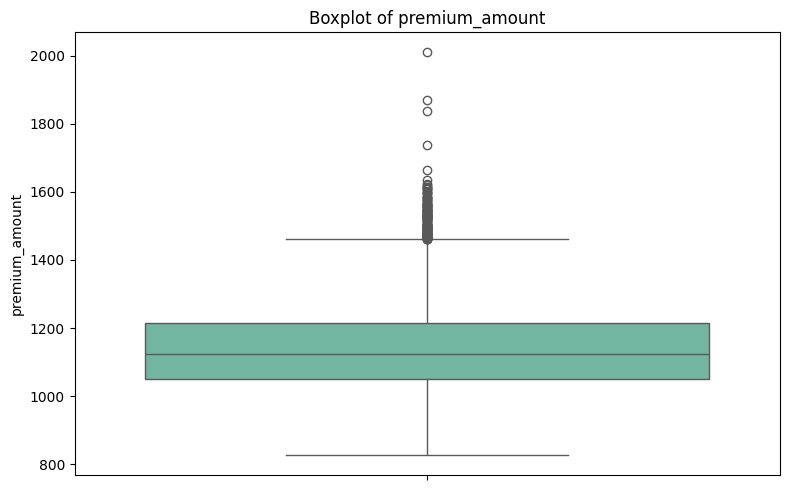

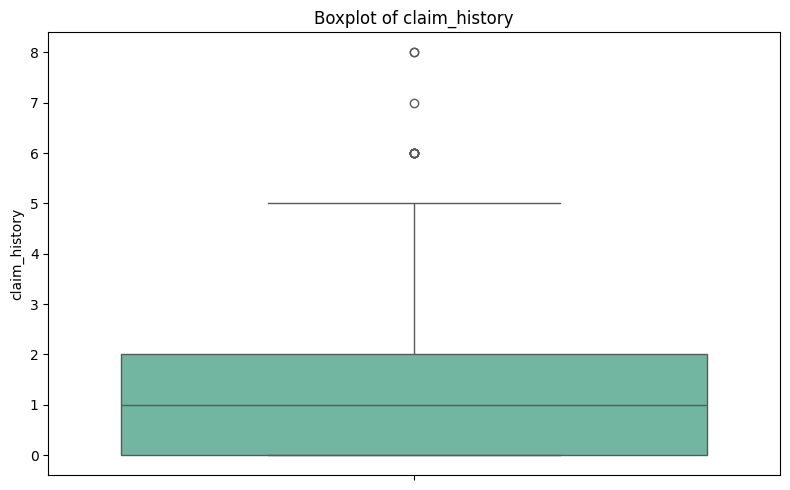

In [ ]:
numerical_cols = ['customer_age', 'monthly_income', 'vehicle_or_property_age',
                  'claim_amount', 'premium_amount', 'claim_history']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col, palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# **Feature selection & Multivariate Analysis**

---



## **Classification & Regression**
 Classification - Risk Classification (Multiclass: Low, Medium, High)

 Regression - Claim Amount Predictio

In [ ]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
df[numerical_cols].corr()

,customer_age,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount
customer_age,1.000000,0.000701,-0.001480,-0.003320,-0.001707,0.042004,0.018384
monthly_income,0.000701,1.000000,0.011816,0.003711,-0.000744,-0.000383,0.001307
vehicle_or_property_age,-0.001480,0.011816,1.000000,-0.004497,0.003641,-0.008339,-0.003104
claim_history,-0.003320,0.003711,-0.004497,1.000000,-0.001917,0.881926,0.227932
fraudulent_claim,-0.001707,-0.000744,0.003641,-0.001917,1.000000,0.004224,-0.002549
premium_amount,0.042004,-0.000383,-0.008339,0.881926,0.004224,1.000000,0.254792
claim_amount,0.018384,0.001307,-0.003104,0.227932,-0.002549,0.254792,1.000000


<Axes: >

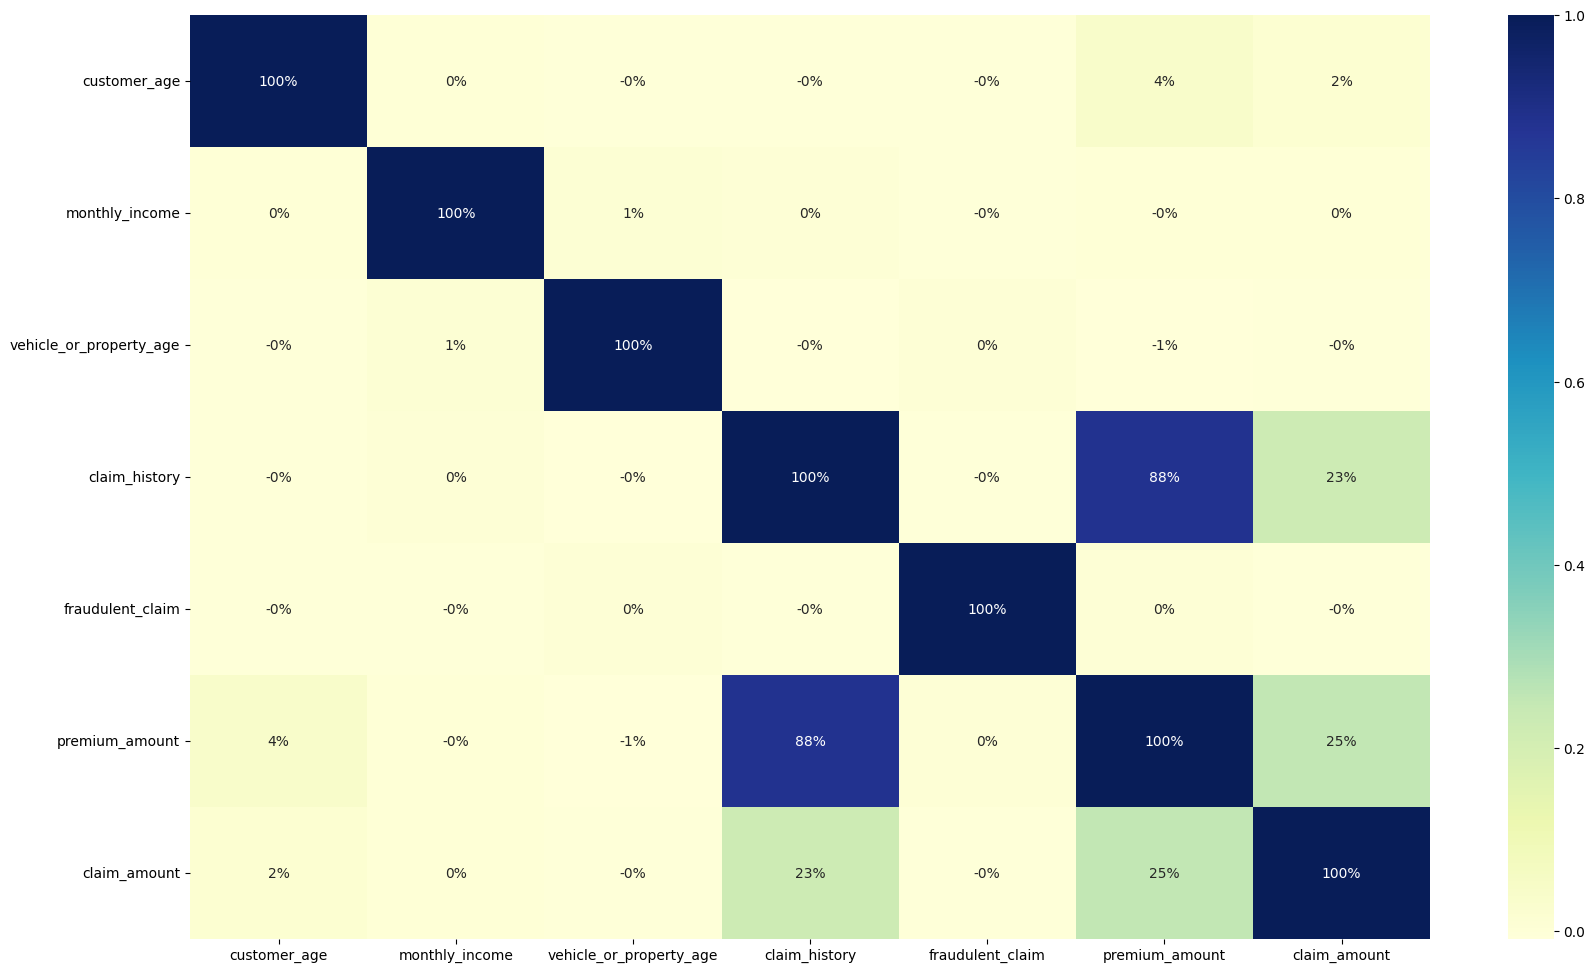

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.0%', cmap='YlGnBu')


1. (0.88) Strong positive correlation – more claim history -> higher premiums. (risk-based pricing)
2. (0.25) Some influence — more premium amount -> higher current claim amount.
3. (0.23) Some influence — more past claim history -> higher current claim amount.











## **Classification**
Classification - Fraudulent Claim (# 0 - NO, 1 - Yes)


In [ ]:
numerical_cols = data.select_dtypes(include=["int64","float64"]).columns
data[numerical_cols].corr()

,customer_age,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount
customer_age,1.000000,-0.001344,-0.025738,-0.005865,-0.017649,0.038653,0.023408
monthly_income,-0.001344,1.000000,0.015244,0.025062,-0.001617,0.019392,0.008202
vehicle_or_property_age,-0.025738,0.015244,1.000000,-0.020105,0.022992,-0.022656,-0.015301
claim_history,-0.005865,0.025062,-0.020105,1.000000,0.016904,0.880932,0.210458
fraudulent_claim,-0.017649,-0.001617,0.022992,0.016904,1.000000,0.014934,0.006983
premium_amount,0.038653,0.019392,-0.022656,0.880932,0.014934,1.000000,0.258149
claim_amount,0.023408,0.008202,-0.015301,0.210458,0.006983,0.258149,1.000000


<Axes: >

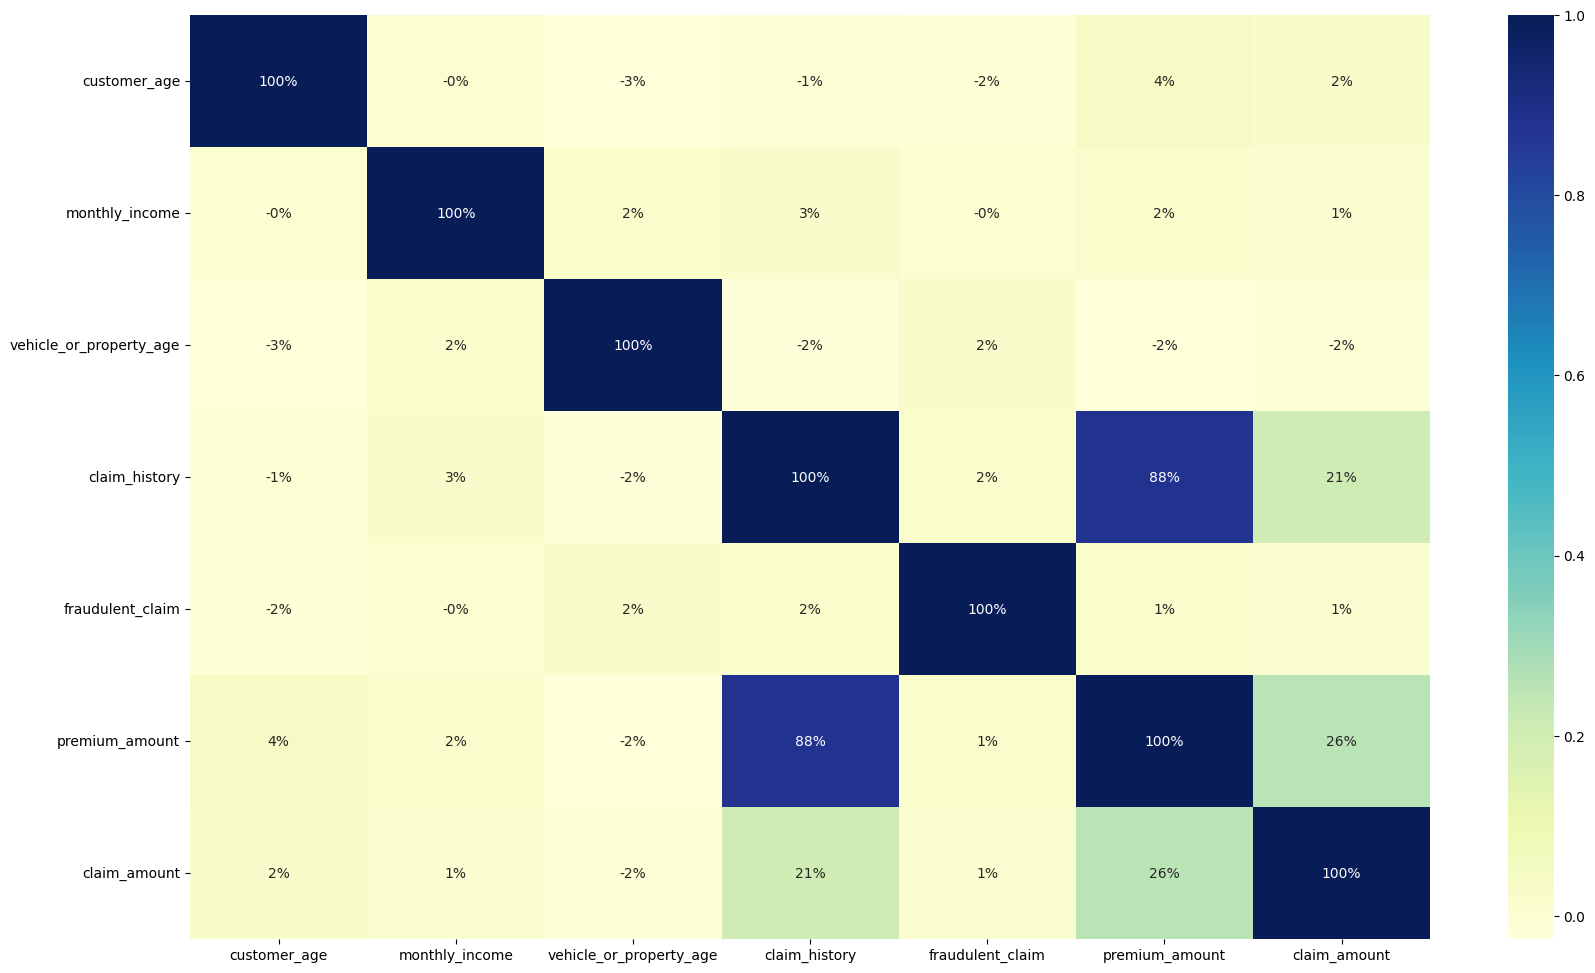

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(data[numerical_cols].corr(),annot=True,fmt='.0%', cmap='YlGnBu')

1. (0.88) Strong positive correlation – more claim history -> higher premiums. (risk-based pricing)
2. (0.26) Some influence — more premium amount -> higher current claim amount.
3. (0.21) Some influence — more past claim history -> higher current claim amount.

# **Encoding**

---



## **Classification & Regression**
 Classification - Risk Classification (Multiclass: Low, Medium, High)

 Regression - Claim Amount Predictio

### **Ordinal Encoding (Label encoding)**

In [ ]:
# target-1
risk_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['risk_score'] = df['risk_score'].str.lower().map(risk_mapping)
df.head()

,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
0,45,Female,Auto,57926.04,6,0,0,1100.36,719.87,0
1,52,Male,Auto,51286.83,3,0,0,891.98,1147.47,0
2,27,Female,Health,64713.71,3,2,0,1127.81,2247.89,0
3,33,Male,Health,50996.19,6,0,0,964.58,1662.83,0
4,49,Female,Property,41687.35,5,1,1,1014.32,2564.04,2


In [ ]:
# target-1
df["risk_score"].value_counts() # (61:32:06)

,count
risk_score,
0,6101
1,3233
2,666


### **one hot encoding**

In [ ]:
df= pd.get_dummies(df, columns=['gender', 'policy_type'])
df.head()

,customer_age,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score,gender_Female,gender_Male,gender_Other,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property
0,45,57926.04,6,0,0,1100.36,719.87,0,True,False,False,True,False,False,False
1,52,51286.83,3,0,0,891.98,1147.47,0,False,True,False,True,False,False,False
2,27,64713.71,3,2,0,1127.81,2247.89,0,True,False,False,False,True,False,False
3,33,50996.19,6,0,0,964.58,1662.83,0,False,True,False,False,True,False,False
4,49,41687.35,5,1,1,1014.32,2564.04,2,True,False,False,False,False,False,True


## **Classification**
 Classification - Fraudulent Claim (# 0 - NO, 1 - Yes)

### **Ordinal Encoding (Label encoding)**

In [ ]:
risk_mapping = {'low': 0, 'medium': 1, 'high': 2}
data['risk_score'] = data['risk_score'].str.lower().map(risk_mapping)
data.head()

,customer_age,gender,policy_type,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score
0,35,Male,Auto,30612.28,4,1,0,1063.48,852.23,0
1,40,Female,Life,72924.54,5,1,0,1107.59,2076.60,0
2,24,Male,Auto,74624.77,4,0,0,1021.60,2505.86,1
3,65,Female,Life,40600.10,0,0,0,1033.50,1080.57,0
4,22,Male,Health,66063.18,3,0,0,984.60,796.33,0


In [ ]:
# target-2
data["fraudulent_claim"].value_counts()

,count
fraudulent_claim,
0,4746
1,1254


### **One Hot Encoding**

In [ ]:
data= pd.get_dummies(data, columns=['gender', 'policy_type'])
data.head()

,customer_age,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score,gender_Female,gender_Male,gender_Other,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property
0,35,30612.28,4,1,0,1063.48,852.23,0,False,True,False,True,False,False,False
1,40,72924.54,5,1,0,1107.59,2076.60,0,True,False,False,False,False,True,False
2,24,74624.77,4,0,0,1021.60,2505.86,1,False,True,False,True,False,False,False
3,65,40600.10,0,0,0,1033.50,1080.57,0,True,False,False,False,False,True,False
4,22,66063.18,3,0,0,984.60,796.33,0,False,True,False,False,True,False,False


# **Train Test Split**

---


## **Classification**
 Classification - Risk Classification (Multiclass: Low, Medium, High)

In [ ]:
x=df.drop(columns=["risk_score"])
y=df["risk_score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)

## **Classification**
 Classification - Fraudulent Claim (# 0 - NO, 1 - Yes)

In [ ]:
x=data.drop(columns=["fraudulent_claim"])
y=data["fraudulent_claim"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## **Regression**
Regression - Claim Amount Prediction

In [ ]:
x=df.drop(columns=["claim_amount"])
y=df["claim_amount"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# **Smote**

---

## **Classification**
 Classification - Risk Score & Fraudulent Claim

 Classification - Risk Classification (Multiclass: Low, Medium, High)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
pd.Series(y_train).value_counts().sort_index()

,count
fraudulent_claim,
0,3806
1,3806


# **Feature Scaling**

---


## **Classification & Regression**
Classification - Risk Score & Fraudulent Claim

Classification - Risk Score & Fraudulent Claim

Regression - Claim Amount Prediction



In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Models**

---


## **CLASSIFICATION - Risk Score classification**

### **classification- MACHINE LEARNING**

In [ ]:
y.value_counts()

,count
risk_score,
0,6101
1,3233
2,666


In [ ]:
y_train.value_counts()

,count
risk_score,
2,4881
0,4881
1,4881


####  Logistic Regression

In [ ]:
log = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

# Train the model
log.fit(x_train, y_train)
train_score = log.score(x_train, y_train)

# Pred
y_pred = log.predict(x_test)

print('Logistic Regression')
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logistic Regression
Train Accuracy: 0.8269
Test Accuracy: 0.8380

Confusion Matrix:
 [[1212    2    6]
 [ 165  334  148]
 [   1    2  130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1220
           1       0.99      0.52      0.68       647
           2       0.46      0.98      0.62       133

    accuracy                           0.84      2000
   macro avg       0.78      0.83      0.74      2000
weighted avg       0.89      0.84      0.83      2000

Balanced Accuracy: 0.8290


In [ ]:
cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.82  0.841 0.827 0.822 0.833 0.824 0.836 0.827 0.851 0.852]
Mean CV Accuracy: 0.8333


In [ ]:
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Type of regularization
}
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           cv=5,               # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'penalty': 'l1'}
Best Score (CV Accuracy): 0.8380823151563319

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1220
           1       0.93      0.58      0.72       647
           2       0.48      0.98      0.65       133

    accuracy                           0.85      2000
   macro avg       0.77      0.85      0.77      2000
weighted avg       0.88      0.85      0.85      2000



####  Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2)

# 'criterion': 'entropy', 'max_depth': 5,10 , 'min_samples_leaf': 1, 'min_samples_split': 2,5

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Train Accuracy: 0.9107
Test Accuracy: 0.9755
Confusion Matrix:
 [[1210   10    0]
 [  10  613   24]
 [   0    5  128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1220
           1       0.98      0.95      0.96       647
           2       0.84      0.96      0.90       133

    accuracy                           0.98      2000
   macro avg       0.94      0.97      0.95      2000
weighted avg       0.98      0.98      0.98      2000

Balanced Accuracy: 0.9672


In [ ]:
cv_scores = cross_val_score(dt, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.995 0.991 0.994 0.99  0.995 0.989 0.994 0.996 0.997 0.993]
Mean CV Accuracy: 0.9934000000000001


In [ ]:
dtree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],         # Splitting criteria
    'max_depth': [None, 5, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Min samples required to split
    'min_samples_leaf': [1, 2, 4],            # Min samples required at a leaf
}
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score: 0.9411308527687139

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1220
           1       0.97      0.92      0.94       647
           2       0.70      0.93      0.80       133

    accuracy                           0.96      2000
   macro avg       0.89      0.95      0.91      2000
weighted avg       0.97      0.96      0.97      2000



####  Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)

# 'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)


print('Random Forest Classifier')
train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Train Score: 0.9689
Test Score: 0.9795
Confusion Matrix:
 [[1219    1    0]
 [   9  610   28]
 [   0    3  130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1220
           1       0.99      0.94      0.97       647
           2       0.82      0.98      0.89       133

    accuracy                           0.98      2000
   macro avg       0.94      0.97      0.95      2000
weighted avg       0.98      0.98      0.98      2000

Balanced Accuracy: 0.9731


In [ ]:
cv_scores = cross_val_score(rf, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1.    0.997 0.998 0.995 0.997 0.996 0.997 0.996 0.998 0.997]
Mean CV Accuracy: 0.9970999999999999


In [ ]:
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],        # number of trees
    'max_depth': [None, 10],        # depth of the tree
    'min_samples_split': [2, 5],        # minimum samples to split a node
    'min_samples_leaf': [1, 2],          # minimum samples at leaf node
    'bootstrap': [True]              # whether bootstrap samples are used
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                      # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)                 # use all processors


# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9625062732389689


####  SVC (Support Vector Classifier)

In [ ]:
svc= SVC(C= 1, gamma= 'scale', kernel= 'rbf',probability=True)
# 'kernel': 'rbf', 'gamma': 'scale', 'C': 1

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)


print('Support Vector Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = svc.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Support Vector Classifier
Accuracy: 0.94
Train Score: 0.9409
Test Score: 0.9390
Confusion Matrix:
 [[1188   32    0]
 [  38  567   42]
 [   0   10  123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1220
           1       0.93      0.88      0.90       647
           2       0.75      0.92      0.83       133

    accuracy                           0.94      2000
   macro avg       0.88      0.92      0.90      2000
weighted avg       0.94      0.94      0.94      2000

Balanced Accuracy: 0.9250


In [ ]:
cv_scores = cross_val_score(svc, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.611 0.61  0.61  0.611 0.61  0.61  0.61  0.611 0.61  0.611]
Mean CV Accuracy: 0.6104


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svc = SVC(probability=True, random_state=42)

param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': [ 1, 10],
    'gamma': ['scale']
}

random_search_svc = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=10,           # Only try 10 random combinations
    scoring='accuracy',
    cv=3,                # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_svc.fit(x_train, y_train)
print("Best Params:", random_search_svc.best_params_)
print("Best Score:", random_search_svc.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best Score: 0.9259031619203716


####  K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
# 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('K-Nearest Neighbors')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = knn.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

K-Nearest Neighbors
Accuracy: 0.91
Train Score: 0.9444
Test Score: 0.9130
Confusion Matrix:
 [[1179   38    3]
 [  74  531   42]
 [   1   16  116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1220
           1       0.91      0.82      0.86       647
           2       0.72      0.87      0.79       133

    accuracy                           0.91      2000
   macro avg       0.86      0.89      0.87      2000
weighted avg       0.92      0.91      0.91      2000

Balanced Accuracy: 0.8864


In [ ]:
cv_scores = cross_val_score(knn, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.625 0.598 0.6   0.616 0.613 0.632 0.616 0.616 0.624 0.609]
Mean CV Accuracy: 0.6149


In [ ]:
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9127903180368913


####  Naive Bayes

In [ ]:
nb = BernoulliNB()
# 'alpha': 0.1, 'fit_prior': True

nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print("Naive Bayes")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = nb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Naive Bayes
Accuracy: 0.82
Train Score: 0.7985
Test Score: 0.8200
Confusion Matrix:
 [[1080  110   30]
 [  58  466  123]
 [   2   37   94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1220
           1       0.76      0.72      0.74       647
           2       0.38      0.71      0.49       133

    accuracy                           0.82      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.85      0.82      0.83      2000

Balanced Accuracy: 0.7708


In [ ]:
cv_scores = cross_val_score(nb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.765 0.772 0.764 0.752 0.775 0.759 0.775 0.779 0.786 0.79 ]
Mean CV Accuracy: 0.7716999999999999


In [ ]:
bnb = BernoulliNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],         # Laplace smoothing
    'fit_prior': [True, False]        # Whether to learn class prior probabilities
}

# Step 5: GridSearchCV
grid = GridSearchCV(bnb, param_grid, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

# Step 6: Evaluation
print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Best parameters: {'alpha': 0.1, 'fit_prior': True}
Best cross-val accuracy: 0.7808509185276241


####  XGBoost

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8)

# 'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2
# learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('XGBoost Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = xgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

XGBoost Classifier
Accuracy: 0.98
Train Score: 1.0000
Test Score: 0.9850

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1220
           1       1.00      0.96      0.98       647
           2       0.83      0.98      0.90       133

    accuracy                           0.98      2000
   macro avg       0.94      0.98      0.96      2000
weighted avg       0.99      0.98      0.99      2000


Confusion Matrix:
 [[1220    0    0]
 [   1  619   27]
 [   0    2  131]]
Balanced Accuracy: 0.9806


In [ ]:
cv_scores = cross_val_score(xgb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.998 0.999 0.999 0.997 1.    0.997 0.998 0.999 0.997 0.996]
Mean CV Accuracy: 0.998


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_distributions=param_dist,
    n_iter=10,  # Try only 10 random combos instead of all 81
    scoring='accuracy',
    cv=3,       # Reduce to 3-fold for speed
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}
Best Score: 0.9633271870518336


####  Light GBM

In [ ]:
import lightgbm as lgb
lgb= lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=20)

# learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20
# objective='binary', metric='binary_error', boosting_type='gbdt', random_state=42
# learning_rate=0.1, max_depth=7, n_estimators=200, num_leaves=50

# Train model
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)

print('Light GBM')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = lgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 14643, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
cv_scores = cross_val_score(lgb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 14
[LightGBM] [Info] Start training from score -0.494296
[LightGBM] [Info] Start training from score -1.129071
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'num_leaves': [20, 30]
}

# Define model without metric (correct)
model = LGBMClassifier(objective='multiclass', boosting_type='gbdt', num_class=3)

# Grid search
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 14643, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

### **classification- DEEP LEARNING**

In [ ]:
y.value_counts()  # 2 => 666
                  # 1 => 3233
                  # 0 => 6101

,count
risk_score,
0,6101
1,3233
2,666


In [ ]:
y_train.value_counts()  # 4881

,count
risk_score,
2,4881
0,4881
1,4881


In [ ]:
y_train[:5] # if this is not one hot encoding then use  loss = 'sparse_categorical_crossentropy' [2,0,1,0,1]

,risk_score
0,2
1,0
2,1
3,0
4,1


In [ ]:
# y_train and y_test are integer labels (0, 1, 2)  One-hot encode your labels for deep learning
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

print(np.bincount(y_train_cat.argmax(axis=1)))
print(np.bincount(y_test_cat.argmax(axis=1)))

[4881 4881 4881]
[1220  647  133]


In [ ]:
# Build the deep learning model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(192, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes: low, medium, high
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # 'sparse_categorical_crossentropy'

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict on test set
y_pred = model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)

# Evaluate model
print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels))

cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

Epoch 1/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7061 - loss: 0.6245 - val_accuracy: 0.7678 - val_loss: 0.6251
Epoch 2/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8915 - loss: 0.2797 - val_accuracy: 0.8617 - val_loss: 0.3318
Epoch 3/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9121 - loss: 0.2323 - val_accuracy: 0.8470 - val_loss: 0.3526
Epoch 4/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9269 - loss: 0.1998 - val_accuracy: 0.8013 - val_loss: 0.4533
Epoch 5/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9368 - loss: 0.1796 - val_accuracy: 0.8829 - val_loss: 0.2203
Epoch 6/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9321 - loss: 0.1766 - val_accuracy: 0.8699 - val_loss: 0.2907
Epoch 7/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9465 - loss: 0.1536 - val_accuracy: 0.8170 - val_loss: 0.4027
Epoch 8/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9538 - loss: 0.1319 - val_accuracy: 

### **classification- Best Model**

In [ ]:
print("Xg boost, Random forest, Deep leaning.")

Xg boost, Random forest, Deep leaning.


### **classification- Manual Testing**

In [ ]:
# Input data
input_data = (45, 57926, 6, 1, 0, 1100, 719, True, False, False, True, False, False, False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = xgb.predict(input_data_reshaped)
predicted_class = prediction[0]

# Output raw prediction
print("Predicted class:", predicted_class)

# Interpret prediction
if predicted_class == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 0
✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.


In [ ]:
# Input data
input_data = (49,58139,5,0,0,1154,1987,False,True,False,True,False,False,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = xgb.predict(input_data_reshaped)
predicted_class = prediction[0]

# Output raw prediction
print("Predicted class:", predicted_class)

# Interpret prediction
if predicted_class == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")


Predicted class: 0
✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.


In [ ]:
# Input data
input_data = (49,41687.35,5,2,2,1014.32,2564.04,True,False,False,False,False,False,True)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = xgb.predict(input_data_reshaped)
predicted_class = prediction[0]

# Output raw prediction
print("Predicted class:", predicted_class)

# Interpret prediction
if predicted_class == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 2
❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.


In [ ]:
# Input data
input_data = (29,58139,5,3,2,854,187,False,True,False,False,True,False,False)


# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = xgb.predict(input_data_reshaped)
predicted_class = prediction[0]

# Output raw prediction
print("Predicted class:", predicted_class)

# Interpret prediction
if predicted_class == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 2
❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.


In [ ]:
# Input data
input_data = (26,83502.47,5,1,2,958.04,1639.12,True,False,False,False,True,False,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = xgb.predict(input_data_reshaped)
predicted_class = prediction[0]

# Output raw prediction
print("Predicted class:", predicted_class)

# Interpret prediction
if predicted_class == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 1
⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.


In [ ]:
# Input data
input_data = (54,79490,6,1,2,1443,786,False,True,False,False,False,True,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = xgb.predict(input_data_reshaped)
predicted_class = prediction[0]

# Output raw prediction
print("Predicted class:", predicted_class)

# Interpret prediction
if predicted_class == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 1
⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.


### **classification- Save the model and scaler**

In [ ]:
with open('risk_score_class_xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [ ]:
files.download('risk_score_class_xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('scaler_risk_score_class.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
files.download('scaler_risk_score_class.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **classification- Open and use it**

In [ ]:
uploaded = files.upload()

Saving risk_score_class_xgb_model.pkl to risk_score_class_xgb_model.pkl
Saving scaler_risk_score_class.pkl to scaler_risk_score_class.pkl


In [ ]:
with open("risk_score_class_xgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [ ]:
input_data = (49,41687.35,5,2,2,1014.32,2564.04,True,False,False,False,False,False,True)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model.predict(input_data_reshaped)
print(y_pred)

# Output raw prediction
print("Predicted class:", y_pred[0])

# Interpret prediction
if y_pred[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif y_pred[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif y_pred[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

[2]
Predicted class: 2
❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.


In [ ]:
input_data = (54,79490,6,1,2,1443,786,False,True,False,False,False,True,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model.predict(input_data_reshaped)
print(y_pred)

# Output raw prediction
print("Predicted class:", y_pred[0])

# Interpret prediction
if y_pred[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif y_pred[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif y_pred[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

[1]
Predicted class: 1
⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.


In [ ]:
input_data = (33,50996.19,6,0,0,964.58,1662.83,False,True,False,False,True,False,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model.predict(input_data_reshaped)
print(y_pred)

# Output raw prediction
print("Predicted class:", y_pred[0])

# Interpret prediction
if y_pred[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif y_pred[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif y_pred[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

[0]
Predicted class: 0
✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.


## **REGRESSION - Claim Amount**

### **Regression - MACHINE LEARNING**

####  Logistic Regression

In [ ]:
lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)
train_score = lr.score(x_train, y_train)

# Pred
y_pred = lr.predict(x_test)

print(f"Linear Regression Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Performance 

Train R² Score: 0.3214938217710954
MAE: 592.9568608443145
RMSE: 713.0807773848276
R² Score: 0.3181709257176112


In [ ]:
cv_scores = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.30915405 0.33809999 0.30879122 0.31594832 0.32522932]
Average R²: 0.3194445789870609


In [ ]:
lr = LinearRegression()

# Grid of hyperparameters
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Best Params: {'fit_intercept': False, 'positive': False}
Best Cross-Validation R²: 0.31798396055503036


####  Ridge Regression (L2 Regularization)

In [ ]:
rl2 = Ridge(alpha=1.0, fit_intercept= True, solver= 'svd')

# Train the model
rl2.fit(x_train, y_train)
train_score = rl2.score(x_train, y_train)

# Pred
y_pred = rl2.predict(x_test)

print("Ridge Regression (L2) Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Ridge Regression (L2) Performance: 

Train R² Score: 0.3214929216607547
MAE: 592.9963207527347
RMSE: 713.0677119046064
R² Score: 0.3181959112254362


In [ ]:
cv_scores = cross_val_score(rl2, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.30913751 0.33806882 0.3087945  0.31596286 0.32525654]
Average R²: 0.31944404607603516


In [ ]:
# Define hyperparameter grid
rl2 = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Step 5: Grid search with 5-fold cross-validation
grid = GridSearchCV(rl2, param_grid, cv=5, scoring='r2',  n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Evaluate best model
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation R² Score:", grid.best_score_)

Best Hyperparameters: {'alpha': 1, 'fit_intercept': False, 'solver': 'svd'}
Best Cross-Validation R² Score: 0.3180112948062474


####  Lasso (L1 regularization)

In [ ]:
l1 = Lasso(alpha=1, fit_intercept = True)

# Train the model
l1.fit(x_train, y_train)
train_score = l1.score(x_train, y_train)

# Pred
y_pred = l1.predict(x_test)
print("Lasso Regression (L1) Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Lasso Regression (L1) Performance: 

Train R² Score: 0.32135527389765906
MAE: 593.0092295307126
RMSE: 712.8344506302572
R² Score: 0.31864190667671777


In [ ]:
cv_scores = cross_val_score(l1, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.30910531 0.33767988 0.30865642 0.31576274 0.32532936]
Average R²: 0.3193067425831503


In [ ]:
l1 = Lasso(alpha=0.1, max_iter=10000)

# Step 4: Grid search parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False]
}

# Step 5: GridSearchCV
grid = GridSearchCV(l1, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Best model info
print("✅ Best Hyperparameters:", grid.best_params_)
print("✅ Best Cross-Validation R² Score:", grid.best_score_)

✅ Best Hyperparameters: {'alpha': 1, 'fit_intercept': False}
✅ Best Cross-Validation R² Score: 0.3181385962450455


####  ElasticNet (L1 + L2)

In [ ]:
el = ElasticNet(max_iter=10000, alpha=0.01, fit_intercept=True, l1_ratio=0.9)

# Train the model
el.fit(x_train, y_train)
train_score = el.score(x_train, y_train)

# Pred
y_pred = el.predict(x_test)

print("ElasticNet (L1 + L2) Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

ElasticNet (L1 + L2) Performance: 

Train R² Score: 0.32143658286012344
MAE: 593.2975364166319
RMSE: 712.9990666321833
R² Score: 0.3183271761077048


In [ ]:
cv_scores = cross_val_score(el, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.30897808 0.33779747 0.30877055 0.31600954 0.32539477]
Average R²: 0.3193900832373643


In [ ]:
elastic = ElasticNet(max_iter=10000)

param_grid = {
    'alpha': [0.01, 0.1, 1, 10],          # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],              # Mix of L1 (lasso) and L2 (ridge)
    'fit_intercept': [True, False]
}

# Step 5: Grid search
grid = GridSearchCV(elastic, param_grid, cv=5, scoring='r2', verbose=1)
grid.fit(x_train, y_train)

# Step 6: Best parameters
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Cross-Val R² Score:", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Parameters: {'alpha': 0.01, 'fit_intercept': False, 'l1_ratio': 0.9}
✅ Best Cross-Val R² Score: 0.31802911507598186


####  Support Vector Regression

In [ ]:
svr = SVR(C=100, epsilon=5, gamma='auto', kernel='rbf')

# Train the model
svr.fit(x_train, y_train)
train_score = svr.score(x_train, y_train)

# Pred
y_pred = svr.predict(x_test)

print("Support Vector Regression Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Support Vector Regression Performance: 

Train R² Score: 0.36871180512259294
MAE: 578.9191868419624
RMSE: 703.1962626707393
R² Score: 0.33694254012375624


In [ ]:
cv_scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [-3.17104476e-04 -3.29708468e-04 -2.30533319e-03  2.85393379e-05
 -9.99909100e-04]
Average R²: -0.0007847031793314363


In [ ]:
# Define hyperparameter grid
svr = SVR()

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],         # Regularization
    'epsilon': [0.1, 1, 5],    # Epsilon-tube
    'gamma': ['scale', 'auto'] # Only used with RBF
}

# Step 5: Grid search with 5-fold cross-validation
grid = GridSearchCV(svr, param_grid, cv=5, scoring='r2',  verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Evaluate best model
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation R² Score:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'C': 100, 'epsilon': 5, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation R² Score: 0.3321641952340634


####  Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42, max_depth= 5, min_samples_leaf= 2, min_samples_split= 10)

# Train the model
dt.fit(x_train, y_train)
train_score = dt.score(x_train, y_train)

# Pred
y_pred = dt.predict(x_test)

print("Decision Tree Regressor Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Decision Tree Regressor Performance: 

Train R² Score: 0.3698443818838397
MAE: 584.0779721734428
RMSE: 706.8559682323222
R² Score: 0.33002296539685816


In [ ]:
cv_scores = cross_val_score(dt, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.34881726 0.36276873 0.33134565 0.35018101 0.33827349]
Average R²: 0.34627722681378514


In [ ]:
# Define hyperparameter grid
dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 5: Grid search with 5-fold cross-validation
grid = GridSearchCV(dt, param_grid, cv=5, scoring='r2',  n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Evaluate best model
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation R² Score:", grid.best_score_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation R² Score: 0.3474325154481188


####  Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

# Train the model
rf.fit(x_train, y_train)
train_score = rf.score(x_train, y_train)

# Pred
y_pred = rf.predict(x_test)

print("Random Forest Regressor Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Random Forest Regressor Performance: 

Train R² Score: 0.5460134253156463
MAE: 558.1348434324461
RMSE: 674.1968959425664
R² Score: 0.3905030241941426


In [ ]:
cv_scores = cross_val_score(rf, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.38363433 0.40927898 0.37969338 0.39786943 0.37738388]
Average R²: 0.38957200125703073


In [ ]:
# Define hyperparameter grid
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Step 5: Grid search with 5-fold cross-validation
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2',  n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Evaluate best model
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation R² Score:", grid.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation R² Score: 0.38406576625782496


####  Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.1, max_depth=3, min_samples_leaf=1,
                                min_samples_split=5, n_estimators=100)

# Train the model
gbr.fit(x_train, y_train)
train_score = gbr.score(x_train, y_train)

# Pred
y_pred = gbr.predict(x_test)

print("Gradient Boosting Regressor Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Gradient Boosting Regressor Performance 

Train R² Score: 0.4242122585468462
MAE: 559.403768443195
RMSE: 673.0156805603563
R² Score: 0.3926368712107645


In [ ]:
cv_scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.39062403 0.41331434 0.37175422 0.4062361  0.38691231]
Average R²: 0.3937682004461053


In [ ]:
gbr = GradientBoostingRegressor(random_state=42)

# Grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation R²: 0.3933164017166969


####  XGBoost Regressor

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.1,
                   max_depth=3, n_estimators=100, subsample=1)

# Train the model
xgb.fit(x_train, y_train)
train_score = xgb.score(x_train, y_train)

# Pred
y_pred = xgb.predict(x_test)

print("XGBoost Regressor Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

XGBoost Regressor Performance 

Train R² Score: 0.4199696962204895
MAE: 560.3596887011719
RMSE: 673.7850837832706
R² Score: 0.39124738125056757


In [ ]:
cv_scores = cross_val_score(xgb, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.39368554 0.41578335 0.37281072 0.40709239 0.38805303]
Average R²: 0.39548500539532727


In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation R²: 0.39318977618439177


####  K-Nearest Neighbors Regression (KNNRegressor)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=11, p=1, weights='distance')

# Train the model
knn.fit(x_train, y_train)
train_score = knn.score(x_train, y_train)

# Pred
y_pred = knn.predict(x_test)

print("KNN Regressor Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

KNN Regressor Performance 

Train R² Score: 1.0
MAE: 584.2668405299113
RMSE: 712.1784460453006
R² Score: 0.3198954049133368


In [ ]:
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [-0.04171759 -0.05631521 -0.04151848 -0.05960407 -0.02968237]
Average R²: -0.04576754391447078


In [ ]:
knn = KNeighborsRegressor()

# Grid of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Cross-Validation R²: 0.30472012024205875


####  LightGBM

In [ ]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=15)

# Train the model
lgbm.fit(x_train, y_train)
train_score = lgbm.score(x_train, y_train)

# Pred
y_pred = lgbm.predict(x_test)

print("LightGBM Regressor Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] Start training from score 1992.580696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
cv_scores = cross_val_score(lgbm, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] Start training from score 1996.437274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
lgbm = LGBMRegressor(random_state=42)

# Grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 50]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(lgbm, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] Start training from score 1992.580696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

### **Regression - DEEP LEARNING**

In [ ]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

####  DL - 1

In [ ]:
# Build the deep learning model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Regression → linear activation

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', rmse])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model
y_pred = model.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))



Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4232708.0000 - mae: 1859.9592 - rmse: 2037.3837 - val_loss: 701692.7500 - val_mae: 708.5502 - val_rmse: 832.1149
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 687203.3125 - mae: 694.4080 - rmse: 824.8032 - val_loss: 594329.3750 - val_mae: 651.7801 - val_rmse: 766.7207
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 632302.0000 - mae: 660.4313 - rmse: 790.5296 - val_loss: 552450.8125 - val_mae: 627.9571 - val_rmse: 739.4894
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 589748.2500 - mae: 638.3253 - rmse: 763.1863 - val_loss: 537102.0625 - val_mae: 611.5101 - val_rmse: 729.0338
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 591868.3750 - mae: 637.6185 - rmse: 765.2576 - val_loss: 529880.5625 - val_mae: 611.9307 - val_rmse: 724.1802
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 591199.7500 - mae: 636.0391 - rmse: 762.4633 - val_loss: 518187.4688 - val_mae: 6

####  DL - 2

In [ ]:
# Build the deep learning model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))
model_1.add(Dense(128, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))
model_1.add(Dense(64, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))
model_1.add(Dense(32, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='linear'))  # Regression → linear activation

# Compile the model
model_1.compile(optimizer='adam', loss='mse', metrics=['mae', rmse])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)


history = model_1.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate the model
y_pred = model_1.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4642556.0000 - mae: 1976.6730 - rmse: 2150.2043 - val_loss: 4795830.0000 - val_mae: 2010.1147 - val_rmse: 2185.5918 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4661182.0000 - mae: 1984.4088 - rmse: 2155.1484 - val_loss: 4750024.5000 - val_mae: 2004.3214 - val_rmse: 2175.2324 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4556756.0000 - mae: 1961.9803 - rmse: 2129.6030 - val_loss: 4646653.0000 - val_mae: 1984.9738 - val_rmse: 2151.4814 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4521496.5000 - mae: 1954.2194 - rmse: 2121.1123 - val_loss: 4533199.5000 - val_mae: 1963.5409 - val_rmse: 2125.1160 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4351379.5000 - mae: 1921.5247 - rmse: 2080.2515 - val_loss: 4430552.0000 - val_mae: 1942.1390 - val_rmse: 2100.9429 - learning_rate: 0.

####  DL - 3

In [ ]:
# Build the deep learning model
model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')]) # Regression → linear activation

# Compile the model
optimizer = Adam(learning_rate=0.001)

model_2.compile(optimizer=optimizer, loss='mse', metrics=['mae', rmse])



# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)


history = model_2.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate the model
y_pred = model_2.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 4678206.5000 - mae: 1981.9961 - rmse: 2158.2026 - val_loss: 4794579.0000 - val_mae: 2009.5933 - val_rmse: 2185.3074 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4651902.0000 - mae: 1981.1301 - rmse: 2153.0164 - val_loss: 4731411.5000 - val_mae: 1999.8950 - val_rmse: 2170.9487 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4611475.5000 - mae: 1973.1206 - rmse: 2141.9553 - val_loss: 4655244.0000 - val_mae: 1987.0776 - val_rmse: 2153.4502 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4498490.0000 - mae: 1950.7982 - rmse: 2117.1147 - val_loss: 4522083.0000 - val_mae: 1960.8911 - val_rmse: 2122.5320 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4364037.5000 - mae: 1924.0851 - rmse: 2084.4788 - val_loss: 4382898.0000 - val_mae: 1932.9001 - val_rmse: 2089.6865 - learning_rate: 0.

####  DL - 4

In [ ]:
# Build the deep learning model
model_3 = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')]) # Regression → linear activation


# Compile the model
optimizer = Adam(learning_rate=0.001)
model_3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

history = model_3.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate the model
y_pred = model_3.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 4664648.5000 - mae: 1981.1626 - val_loss: 4790334.5000 - val_mae: 2008.9956 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4589870.0000 - mae: 1962.8950 - val_loss: 4754465.0000 - val_mae: 2005.6960 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 4587071.5000 - mae: 1966.7678 - val_loss: 4674944.0000 - val_mae: 1992.4408 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4442293.5000 - mae: 1943.3361 - val_loss: 4539051.5000 - val_mae: 1966.1774 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4345517.0000 - mae: 1921.3516 - val_loss: 4390030.5000 - val_mae: 1934.2690 - learning_rate: 0.0010
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4274673.0000 - mae: 1905.5879 - val_loss: 4280125.0000 - val_mae: 1910.4697 - learning_rate: 0.0010
Epoch 7/200
200/200 ━━━━━━━━

In [ ]:
## Build the improved model
model_3_improved = Sequential([
    Dense(512, kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')  # Output layer for regression
])

# Compile
optimizer = Adam(learning_rate=0.001)
model_3_improved.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

# Train
history = model_3_improved.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate
y_pred = model_3_improved.predict(x_test).flatten()

print("\nDeep Learning Regression Performance (Improved Model 4):")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 4715401.0000 - mae: 1994.2897 - val_loss: 4789197.0000 - val_mae: 2009.2150 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4683433.0000 - mae: 1985.6323 - val_loss: 4724884.0000 - val_mae: 1999.9337 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 4651303.0000 - mae: 1983.7578 - val_loss: 4624297.5000 - val_mae: 1982.3628 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4523162.0000 - mae: 1958.3500 - val_loss: 4547995.5000 - val_mae: 1968.3003 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4336992.5000 - mae: 1918.7406 - val_loss: 4401862.5000 - val_mae: 1936.6127 - learning_rate: 0.0010
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4287839.0000 - mae: 1912.7213 - val_loss: 4212534.5000 - val_mae: 1895.7120 - learning_rate: 0.0010
Epoch 7/200
200/200 ━━━━━━━━

In [ ]:
# Build the improved model
model_3_improved1 = Sequential([
    Dense(512, kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')  # Output layer for regression
])

# Compile
optimizer = Adam(learning_rate=0.001)
model_3_improved1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

# Train
history = model_3_improved1.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate
y_pred = model_3_improved1.predict(x_test).flatten()

print("\nDeep Learning Regression Performance (Improved Model 4):")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 4682107.0000 - mae: 1984.1941 - val_loss: 4792334.5000 - val_mae: 2009.5247 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4603898.0000 - mae: 1971.6803 - val_loss: 4752119.5000 - val_mae: 2005.8527 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4664191.0000 - mae: 1983.3754 - val_loss: 4655918.0000 - val_mae: 1989.0875 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4564410.0000 - mae: 1966.0149 - val_loss: 4529401.0000 - val_mae: 1964.3093 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4387255.5000 - mae: 1928.6837 - val_loss: 4402775.5000 - val_mae: 1939.3540 - learning_rate: 0.0010
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4223786.0000 - mae: 1893.7201 - val_loss: 4237601.5000 - val_mae: 1904.3567 - learning_rate: 0.0010
Epoch 7/200
200/200 ━━━━━━━━

####  DL - 5

In [ ]:
# Build the deep learning model
model_4 = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')]) # Regression → linear activation


# Compile the model
optimizer = RMSprop(learning_rate=0.0005)
model_4.compile(optimizer=optimizer, loss='mse', metrics=['mae', rmse])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

history = model_4.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate the model
y_pred = model_4.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 4697596.5000 - mae: 1984.4192 - rmse: 2162.5835 - val_loss: 4800511.5000 - val_mae: 2009.9868 - val_rmse: 2186.6328 - learning_rate: 5.0000e-04
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 4657017.0000 - mae: 1983.9061 - rmse: 2153.2339 - val_loss: 4792625.5000 - val_mae: 2009.9056 - val_rmse: 2184.8831 - learning_rate: 5.0000e-04
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 4623026.5000 - mae: 1976.6129 - rmse: 2143.9485 - val_loss: 4781317.0000 - val_mae: 2008.7603 - val_rmse: 2182.3271 - learning_rate: 5.0000e-04
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4675135.0000 - mae: 1986.6409 - rmse: 2157.7102 - val_loss: 4771969.5000 - val_mae: 2007.7606 - val_rmse: 2180.2178 - learning_rate: 5.0000e-04
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4626017.5000 - mae: 1978.8569 - rmse: 2144.6201 - val_loss: 4753461.0000 - val_mae: 2004.9094 - val_rmse: 2176.00

####  DL - 6

In [ ]:
#log-transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
# Build the deep learning model
model_5 = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')]) # Regression → linear activation


# Compile the model
optimizer = RMSprop(learning_rate=0.0005)
model_5.compile(optimizer=optimizer, loss='mse', metrics=['mae', rmse])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

history = model_5.fit(
    x_train, y_train_log,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Predict and inverse transform the target
y_pred_log = model_5.predict(x_test).flatten()

# Handle bad predictions: clip upper bound to prevent overflow
y_pred_log = np.clip(y_pred_log, a_min=None, a_max=15)  # np.expm1(15) ≈ 3.2e6
y_pred = np.expm1(y_pred_log)


y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log)

# Evaluation
print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R² Score:", r2_score(y_true, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 54.8536 - mae: 7.2496 - rmse: 7.4013 - val_loss: 51.7177 - val_mae: 7.1707 - val_rmse: 7.1910 - learning_rate: 5.0000e-04
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 40.1877 - mae: 6.1967 - rmse: 6.3312 - val_loss: 28.9171 - val_mae: 5.3343 - val_rmse: 5.3764 - learning_rate: 5.0000e-04
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 23.5901 - mae: 4.6199 - rmse: 4.8397 - val_loss: 10.5904 - val_mae: 3.1713 - val_rmse: 3.2522 - learning_rate: 5.0000e-04
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.4071 - mae: 2.6566 - rmse: 3.0306 - val_loss: 1.1795 - val_mae: 0.9207 - val_rmse: 1.0808 - learning_rate: 5.0000e-04
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.1300 - mae: 1.3755 - rmse: 1.7467 - val_loss: 0.3881 - val_mae: 0.5204 - val_rmse: 0.6191 - learning_rate: 5.0000e-04
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3133 - mae: 1.1862 - rms

####  ML & DL - 7 (compare)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Blended Model Performance:
MAE: 557.1211315369231
RMSE: 671.7580147201302
R² Score: 0.3949047118226793


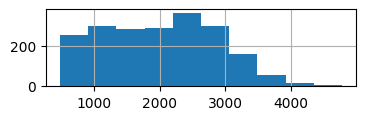

In [ ]:
# α controls how much weight to give to ML vs DL (try 0.5 first)
alpha = 0.5

y_pred_ml = gbr.predict(x_test)
y_pred_dl = model_3_improved.predict(x_test).flatten()

# Blended predictions
y_pred_blend = alpha * y_pred_ml + (1 - alpha) * y_pred_dl

# Evaluate
print("\nBlended Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_blend))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_blend)))
print("R² Score:", r2_score(y_test, y_pred_blend))

In [ ]:
best_alpha = 0
best_r2 = -np.inf

for alpha in np.arange(0, 1.05, 0.05):
    y_blend = alpha * y_pred_ml + (1 - alpha) * y_pred_dl
    r2 = r2_score(y_test, y_blend)
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

print(f"\n✅ Best alpha: {best_alpha}")
print(f"Best Blended R² Score: {best_r2}")


✅ Best alpha: 0.7000000000000001
Best Blended R² Score: 0.3958703860545637


In [ ]:
## α controls how much weight to give to ML vs DL (try 0.5 first)
alpha = 0.7

y_pred_ml = gbr.predict(x_test)
y_pred_dl = model_3_improved.predict(x_test).flatten()

# Blended predictions
y_pred_blend_1 = alpha * y_pred_ml + (1 - alpha) * y_pred_dl

# Evaluate
print("\nBlended Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_blend_1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_blend_1)))
print("R² Score:", r2_score(y_test, y_pred_blend_1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Blended Model Performance:
MAE: 557.8328280690608
RMSE: 671.352003930377
R² Score: 0.39563593040839573


### **Regression- Best Model**

In [ ]:
print("Gradient Boosting, LightGBM, XGBoost, Random Forest")

Gradient Boosting, LightGBM, XGBoost, Random Forest


In [ ]:
print("model_3_improved") ## dl-4, ml & dl-7

model_3_improved


### **Regression- Manual Testing**

In [ ]:
input_data = (45,57926.04,6,0,0,1100.36,0,True,False,False,True,False,False,False)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = gbr.predict(input_data_reshaped)
print(prediction[0])
print(f"The claim amount is Rs {prediction[0]:.2f}")

1796.804468440377
The claim amount is Rs 1796.80


In [ ]:
input_data = (49,41687.35,5,1,1,1014.32,2,True,False,False,False,False,False,True)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = gbr.predict(input_data_reshaped)
print(prediction[0])
print(f"The claim amount is Rs {prediction[0]:.2f}")

3257.3762922209307
The claim amount is Rs 3257.38


### **Regression - Save the model and scaler**

#### Save the model

In [ ]:
# Save Gradient Boosting Regressor (ML model)
with open('claim_amount_reg_gbr_model.pkl', 'wb') as f:
    pickle.dump(gbr, f)

# Save alpha value
with open('claim_amount_reg_alpha_value.pkl', 'wb') as f:
    pickle.dump(alpha, f)

# Save HDF5 format (.h5)
model_3_improved.save('claim_amount_reg_deep_model_3_improved.h5')

In [ ]:
# Save HDF5 format (.keras)
model_3_improved.save("claim_amount_reg_deep_model_3_improved.keras")

In [ ]:
with open('scaler_claim_reg.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#### download the model

In [ ]:
files.download('claim_amount_reg_gbr_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('claim_amount_reg_alpha_value.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# files.download('claim_amount_reg_deep_model_3_improved.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("claim_amount_reg_deep_model_3_improved.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('scaler_claim_reg.pkl')

### **Regression - Open and use it**

In [ ]:
uploaded = files.upload()

Saving claim_amount_reg_alpha_value.pkl to claim_amount_reg_alpha_value.pkl
Saving claim_amount_reg_deep_model_3_improved.keras to claim_amount_reg_deep_model_3_improved.keras
Saving claim_amount_reg_gbr_model.pkl to claim_amount_reg_gbr_model.pkl
Saving scaler_claim_reg.pkl to scaler_claim_reg.pkl


In [ ]:
#from keras.losses import MeanSquaredError
#loss=MeanSquaredError()

In [ ]:
# loaded_model_dl = load_model("claim_amount_reg_deep_model_3_improved.h5", custom_objects={'LeakyReLU': LeakyReLU})

In [ ]:
# Load from .h5 or .keras file
loaded_model_dl = load_model("claim_amount_reg_deep_model_3_improved.keras", custom_objects={'LeakyReLU': LeakyReLU})

In [ ]:
with open("claim_amount_reg_gbr_model.pkl", "rb") as file:
    loaded_model_gbr = pickle.load(file)

In [ ]:
with open("claim_amount_reg_alpha_value.pkl", "rb") as file:
    loaded_model_alpha = pickle.load(file)

In [ ]:
with open("scaler_claim_reg.pkl", "rb") as file:
    scaler= pickle.load(file)

In [ ]:
input_data = (45,57926.04,6,0,0,1100.36,0,True,False,False,True,False,False,False)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
scaled_input = scaler.transform(input_data_reshaped)

In [ ]:
y_pred_ml = loaded_model_gbr.predict(input_data_reshaped)
print("ML Prediction: ₹",y_pred_ml[0])

ML Prediction: ₹ 1796.804468440377


In [ ]:
y_pred_dl = loaded_model_dl.predict(scaled_input).flatten()
print("DL Prediction: ₹",y_pred_dl[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
DL Prediction: ₹ 1429.6848


In [ ]:
alpha = loaded_model_alpha
y_pred_blend = alpha * y_pred_ml + (1 - alpha) * y_pred_dl

print("Blended Prediction: ₹",y_pred_blend[0])

Blended Prediction: ₹ 1686.6685844512326


In [ ]:
 def predict_claim(customer_input, scaler, gbr_model, dl_model, alpha):
    customer_input = np.array(customer_input).reshape(1, -1)
    scaled_input = scaler.transform(customer_input)

    pred_ml = gbr_model.predict(customer_input)[0]
    pred_dl = dl_model.predict(scaled_input).flatten()[0]
    blended_pred = alpha * pred_ml + (1 - alpha) * pred_dl

    return {
        "ML Prediction": pred_ml,
        "DL Prediction": pred_dl,
        "Blended Prediction": blended_pred
    }

# Example usage:
#
customer_data = [33,50996.19,6,0,0,964.58,0,False,True,False,False,True,False,False]  # must match feature order
result = predict_claim(customer_data, scaler, loaded_model_gbr, loaded_model_dl, loaded_model_alpha)

for k, v in result.items():
    print(f"{k}: ₹{v:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
ML Prediction: ₹2054.70
DL Prediction: ₹1834.72
Blended Prediction: ₹1988.71


## **CLASSIFICATION - Fraudulent Claim**

### **classification- MACHINE LEARNING**

####  Logistic Regression

In [ ]:
log = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
# 'C': 1, 'penalty': 'l1'

# Train the model
log.fit(x_train, y_train)
train_score = log.score(x_train, y_train)

# Pred
y_pred = log.predict(x_test)

print('Logistic Regression')
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = log.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logistic Regression
Train Accuracy: 0.9540
Test Accuracy: 0.9525

Confusion Matrix:
 [[891  49]
 [  8 252]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       940
           1       0.84      0.97      0.90       260

    accuracy                           0.95      1200
   macro avg       0.91      0.96      0.93      1200
weighted avg       0.96      0.95      0.95      1200

AUC Score: 0.9842
Balanced Accuracy: 0.9586


In [ ]:
cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.885      0.90833333 0.89333333 0.91833333 0.90333333 0.89833333
 0.89       0.905      0.90833333 0.90333333]
Mean CV Accuracy: 0.9013333333333332


In [ ]:
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Type of regularization
}
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           cv=5,               # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 0.01, 'penalty': 'l1'}
Best Score (CV Accuracy): 0.9511323956883633

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       940
           1       0.84      0.97      0.90       260

    accuracy                           0.95      1200
   macro avg       0.91      0.96      0.93      1200
weighted avg       0.96      0.95      0.95      1200



####  Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = dt.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Train Accuracy: 0.9942
Test Accuracy: 0.9925
Confusion Matrix:
 [[939   1]
 [  8 252]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       940
           1       1.00      0.97      0.98       260

    accuracy                           0.99      1200
   macro avg       0.99      0.98      0.99      1200
weighted avg       0.99      0.99      0.99      1200

AUC Score: 0.9974
Balanced Accuracy: 0.9841


In [ ]:
cv_scores = cross_val_score(dt, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.995      0.995      0.995      0.99166667 0.99666667 0.99
 0.99333333 0.99166667 0.99166667 0.99166667]
Mean CV Accuracy: 0.9931666666666666


In [ ]:
dtree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],         # Splitting criteria
    'max_depth': [None, 5, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Min samples required to split
    'min_samples_leaf': [1, 2, 4],            # Min samples required at a leaf
}
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation Score: 0.9921181394698719

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       940
           1       1.00      0.97      0.98       260

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



####  Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth= 20, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)
#'bootstrap': False

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)

print('Random Forest Classifier')
train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Train Score: 0.9999
Test Score: 0.9900
Confusion Matrix:
 [[933   7]
 [  5 255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       940
           1       0.97      0.98      0.98       260

    accuracy                           0.99      1200
   macro avg       0.98      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200

AUC Score: 0.9993
Balanced Accuracy: 0.9867


In [ ]:
cv_scores = cross_val_score(rf, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.99333333 0.995      0.99666667 0.99166667 0.99333333 0.995
 0.99666667 0.995      0.99333333 0.99666667]
Mean CV Accuracy: 0.9946666666666667


In [ ]:
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 10, 20, 30],        # depth of the tree
    'min_samples_split': [2, 5, 10],        # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],          # minimum samples at leaf node
    'bootstrap': [True, False]              # whether bootstrap samples are used
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                      # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)                 # use all processors


# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9911995913729299


####  SVC (Support Vector Classifier)

In [ ]:
svc= SVC(C= 10, gamma= 'scale', kernel= 'rbf',probability=True)

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print('Support Vector Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = svc.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = svc.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Support Vector Classifier
Accuracy: 0.98
Train Score: 0.9963
Test Score: 0.9758
Confusion Matrix:
 [[929  11]
 [ 18 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       940
           1       0.96      0.93      0.94       260

    accuracy                           0.98      1200
   macro avg       0.97      0.96      0.96      1200
weighted avg       0.98      0.98      0.98      1200

AUC Score: 0.9935
Balanced Accuracy: 0.9595


In [ ]:
cv_scores = cross_val_score(svc, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.79166667 0.79166667 0.79166667 0.79166667 0.79166667 0.79166667
 0.79       0.79       0.79       0.79      ]
Mean CV Accuracy: 0.791


In [ ]:
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
]
# Initialize SVC model
svc = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on training data
grid_search_svc.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search_svc.best_params_)
print("Best Score:", grid_search_svc.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.9830556952829286


####  K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights= 'distance')

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('K-Nearest Neighbors')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = knn.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

K-Nearest Neighbors
Accuracy: 0.96
Train Score: 1.0000
Test Score: 0.9583
Confusion Matrix:
 [[919  21]
 [ 29 231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       940
           1       0.92      0.89      0.90       260

    accuracy                           0.96      1200
   macro avg       0.94      0.93      0.94      1200
weighted avg       0.96      0.96      0.96      1200

AUC Score: 0.9861
Balanced Accuracy: 0.9331


In [ ]:
cv_scores = cross_val_score(knn, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.835      0.84666667 0.83833333 0.82       0.84166667 0.84333333
 0.85166667 0.815      0.85166667 0.82333333]
Mean CV Accuracy: 0.8366666666666667


In [ ]:
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9734677994793801


####  Naive Bayes

In [ ]:
nb = BernoulliNB()
# alpha': 0.1, 'fit_prior': True

nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print("Naive Bayes")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = nb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = nb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Naive Bayes
Accuracy: 0.85
Train Score: 0.8877
Test Score: 0.8475
Confusion Matrix:
 [[757 183]
 [  0 260]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       940
           1       0.59      1.00      0.74       260

    accuracy                           0.85      1200
   macro avg       0.79      0.90      0.82      1200
weighted avg       0.91      0.85      0.86      1200

AUC Score: 0.9219
Balanced Accuracy: 0.9027


In [ ]:
cv_scores = cross_val_score(nb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.83166667 0.84       0.83       0.85       0.85833333 0.83333333
 0.85333333 0.82666667 0.83833333 0.86      ]
Mean CV Accuracy: 0.8421666666666667


In [ ]:
bnb = BernoulliNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],         # Laplace smoothing
    'fit_prior': [True, False]        # Whether to learn class prior probabilities
}

# Step 5: GridSearchCV
grid = GridSearchCV(bnb, param_grid, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

# Step 6: Evaluation
print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Best parameters: {'alpha': 0.1, 'fit_prior': True}
Best cross-val accuracy: 0.8868891185345253


####  XGBoost

In [ ]:
xgb = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7)

# 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7
# learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8
# objective='binary:logistic', eval_metric='logloss', use_label_encoder=False,random_state=42

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('XGBoost Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = xgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_probs = xgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

XGBoost Classifier
Accuracy: 0.87
Train Score: 0.9033
Test Score: 0.8700

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       940
           1       0.62      1.00      0.77       260

    accuracy                           0.87      1200
   macro avg       0.81      0.92      0.84      1200
weighted avg       0.92      0.87      0.88      1200


Confusion Matrix:
 [[784 156]
 [  0 260]]
AUC Score: 0.9871
Balanced Accuracy: 0.9170


In [ ]:
cv_scores = cross_val_score(xgb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.92833333 0.93166667 0.90666667 0.915      0.91166667 0.935
 0.90833333 0.93833333 0.91333333 0.92      ]
Mean CV Accuracy: 0.9208333333333334


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best cross-val accuracy: 0.8868891185345253


####  Light GBM

In [ ]:
import lightgbm as lgb
lgb= lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=20)

# learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20
# objective='binary', metric='binary_error', boosting_type='gbdt', random_state=42
# learning_rate=0.1, max_depth=7, n_estimators=200, num_leaves=50

# Train model
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)

print('Light GBM')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = lgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_probs = lgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

[LightGBM] [Info] Number of positive: 3806, number of negative: 3806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 7612, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
cv_scores = cross_val_score(lgb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

[LightGBM] [Info] Number of positive: 1129, number of negative: 4271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 5400, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.209074 -> initscore=-1.330516
[LightGBM] [Info] Start training from score -1.330516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 50]
}

# Define model without metric (correct)
model = LGBMClassifier(objective='multiclass', boosting_type='gbdt', num_class=3)

# Grid search
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 7612, number of used features: 14
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

### **classification- DEEP LEARNING**

In [ ]:
# Build the binary classification model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(192, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary output for fraud detection
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred_labels = (y_pred_probs > 0.5).astype(int)  # Threshold at 0.5

# Evaluate model
print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8140 - loss: 0.3578 - val_accuracy: 0.9888 - val_loss: 0.0363
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9624 - loss: 0.0926 - val_accuracy: 0.9928 - val_loss: 0.0301
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9642 - loss: 0.0857 - val_accuracy: 0.9869 - val_loss: 0.0335
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9702 - loss: 0.0666 - val_accuracy: 0.9849 - val_loss: 0.0464
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9716 - loss: 0.0622 - val_accuracy: 0.9915 - val_loss: 0.0276
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9748 - loss: 0.0587 - val_accuracy: 0.9915 - val_loss: 0.0209
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9759 - loss: 0.0599 - val_accuracy: 0.9915 - val_loss: 0.0208
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9787 - loss: 0.0483 - val_accuracy: 0.

### **classification- Best Model**

In [ ]:
print("lgb, rf")

lgb, rf


### **classification- Manual Testing**

In [ ]:
# Input data
input_data = (32,52352,5,0,980,1408,0,False,True,False,False,False,True,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = lgb.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data
input_data = (23,80996,6,0,1964,62,0,False,True,False,False,False,False,True)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = lgb.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data
input_data = (45,57926,6,0,1100,719,0,True,False,False,True,False,False,False)
# 45,57926,6,0,1100,719,0,False,True,False,False,False,False,True

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = lgb.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data
input_data = (52,51286,3,0,891,1147,0,False,True,False,True,False,False,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = lgb.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data
input_data = (49,41687,5,0,1014,564,2,True,False,False,False,False,False,True)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = lgb.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
# Input data
input_data = (36,63502,5,0,0,958,1639,False,True,False,False,True,False,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = lgb.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
# Input data
input_data = (48,72869,2,0,0,1007,824,True,False,False,False,False,False,True)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = lgb.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
# Input data
input_data = (30,55169,6,0,0,1540,1275,False,True,False,True,False,False,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = lgb.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


### **classification- Save the model and scaler**

In [ ]:
with open('fraud_claim_class_lgb_model.pkl', 'wb') as file:
    pickle.dump(lgb, file)

In [ ]:
files.download('fraud_claim_class_lgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('scaler_fraud_claim_class.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
files.download('scaler_fraud_claim_class.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **classification- Open and use it**

In [ ]:
uploaded = files.upload()

Saving fraud_claim_class_lgb_model.pkl to fraud_claim_class_lgb_model (1).pkl
Saving scaler_fraud_claim_class.pkl to scaler_fraud_claim_class (1).pkl


In [ ]:
with open("fraud_claim_class_lgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [ ]:
input_data = (45,57926.04,6,0,1100,719,0,False,True,False,False,False,False,True)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model.predict(input_data_reshaped)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
input_data = (30,55169,6,0,0,1540,1275,False,True,False,True,False,False,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model.predict(input_data_reshaped)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


### **Unsupervised Learning - Anomaly Detection**

####  Isolation Forest

In [ ]:
data.head()

,customer_age,monthly_income,vehicle_or_property_age,claim_history,fraudulent_claim,premium_amount,claim_amount,risk_score,gender_Female,gender_Male,gender_Other,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property
0,35,30612.28,4,1,0,1063.48,852.23,0,False,True,False,True,False,False,False
1,40,72924.54,5,1,0,1107.59,2076.60,0,True,False,False,False,False,True,False
2,24,74624.77,4,0,0,1021.60,2505.86,1,False,True,False,True,False,False,False
3,65,40600.10,0,0,0,1033.50,1080.57,0,True,False,False,False,False,True,False
4,22,66063.18,3,0,0,984.60,796.33,0,False,True,False,False,True,False,False


In [ ]:
x.head(17)

,customer_age,monthly_income,vehicle_or_property_age,claim_history,premium_amount,claim_amount,risk_score,gender_Female,gender_Male,gender_Other,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property
0,35,30612.28,4,1,1063.48,852.23,0,False,True,False,True,False,False,False
1,40,72924.54,5,1,1107.59,2076.60,0,True,False,False,False,False,True,False
2,24,74624.77,4,0,1021.60,2505.86,1,False,True,False,True,False,False,False
3,65,40600.10,0,0,1033.50,1080.57,0,True,False,False,False,False,True,False
4,22,66063.18,3,0,984.60,796.33,0,False,True,False,False,True,False,False
5,41,70148.55,0,1,1135.41,1709.55,0,False,True,False,False,True,False,False
6,44,32769.44,5,1,1155.40,2955.09,1,True,False,False,False,False,False,True
7,35,72441.35,1,0,1003.52,2804.19,1,False,True,False,True,False,False,False
8,60,57090.08,5,0,985.64,524.70,0,False,True,False,False,False,False,True
9,54,58026.70,3,2,1176.22,869.83,0,True,False,False,False,False,False,True


In [ ]:
y.head(17)

,fraudulent_claim
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# Separate features and target
x_base = data.drop(columns=['fraudulent_claim'])
y = data['fraudulent_claim']

In [ ]:
x_base.head(10)

,customer_age,monthly_income,vehicle_or_property_age,claim_history,premium_amount,claim_amount,risk_score,gender_Female,gender_Male,gender_Other,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property
0,35,30612.28,4,1,1063.48,852.23,0,False,True,False,True,False,False,False
1,40,72924.54,5,1,1107.59,2076.60,0,True,False,False,False,False,True,False
2,24,74624.77,4,0,1021.60,2505.86,1,False,True,False,True,False,False,False
3,65,40600.10,0,0,1033.50,1080.57,0,True,False,False,False,False,True,False
4,22,66063.18,3,0,984.60,796.33,0,False,True,False,False,True,False,False
5,41,70148.55,0,1,1135.41,1709.55,0,False,True,False,False,True,False,False
6,44,32769.44,5,1,1155.40,2955.09,1,True,False,False,False,False,False,True
7,35,72441.35,1,0,1003.52,2804.19,1,False,True,False,True,False,False,False
8,60,57090.08,5,0,985.64,524.70,0,False,True,False,False,False,False,True
9,54,58026.70,3,2,1176.22,869.83,0,True,False,False,False,False,False,True


In [ ]:
x_base.tail(10)

,customer_age,monthly_income,vehicle_or_property_age,claim_history,premium_amount,claim_amount,risk_score,gender_Female,gender_Male,gender_Other,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property
5990,41,68951.51,4,1,1159.46,2083.25,0,False,True,False,True,False,False,False
5991,45,60775.77,3,2,1216.74,3174.52,0,False,True,False,False,True,False,False
5992,42,51021.82,8,1,1108.03,2746.27,2,False,True,False,False,False,False,True
5993,58,43216.84,0,1,1060.22,2520.51,2,False,False,True,False,False,False,True
5994,27,85307.12,6,2,1305.92,2117.81,0,True,False,False,True,False,False,False
5995,45,46044.35,4,0,1065.08,798.81,0,False,True,False,False,True,False,False
5996,34,74890.33,6,1,1070.09,884.54,0,True,False,False,False,True,False,False
5997,20,55325.67,3,2,1225.68,1682.61,0,False,True,False,False,True,False,False
5998,39,79937.13,4,1,1123.84,2111.32,0,True,False,False,False,False,True,False
5999,55,59457.29,2,1,1190.99,3323.62,1,False,False,True,True,False,False,False


In [ ]:
y.tail(10)

,fraudulent_claim
5990,0
5991,0
5992,1
5993,1
5994,0
5995,0
5996,0
5997,0
5998,0
5999,0


In [ ]:
#Train Isolation Forest with contamination=0.30
iso_model = IsolationForest(contamination=0.3, random_state=42)
anomaly_labels = iso_model.fit_predict(x_base)

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
anomaly_flags = np.where(anomaly_labels == -1, 1, 0)

# Add Anomaly_Flag to features
x_base['anomaly_flag'] = anomaly_flags

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_base, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

####  Combining Anomaly Detection with Supervised Learning

In [ ]:
x_base.head()

,customer_age,monthly_income,vehicle_or_property_age,claim_history,premium_amount,claim_amount,risk_score,gender_Female,gender_Male,gender_Other,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property,anomaly_flag
0,35,30612.28,4,1,1063.48,852.23,0,False,True,False,True,False,False,False,0
1,40,72924.54,5,1,1107.59,2076.60,0,True,False,False,False,False,True,False,0
2,24,74624.77,4,0,1021.60,2505.86,1,False,True,False,True,False,False,False,0
3,65,40600.10,0,0,1033.50,1080.57,0,True,False,False,False,False,True,False,1
4,22,66063.18,3,0,984.60,796.33,0,False,True,False,False,True,False,False,0


In [ ]:
# Train classifier (Random Forest)
cm1_model = RandomForestClassifier(class_weight='balanced', random_state=42)
cm1_model.fit(x_train, y_train)

# Evaluate
y_pred = cm1_model.predict(x_test)
y_proba = cm1_model.predict_proba(x_test)[:, 1]

print("Combining Anomaly Detection with Supervised Learning\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Combining Anomaly Detection with Supervised Learning

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       940
           1       0.99      0.97      0.98       260

    accuracy                           0.99      1200
   macro avg       0.99      0.98      0.99      1200
weighted avg       0.99      0.99      0.99      1200

Confusion Matrix:
[[937   3]
 [  9 251]]
ROC AUC Score: 0.9993453355155483


In [ ]:
import lightgbm as lgb
cm2_model= lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=20)
cm2_model.fit(x_train, y_train)

# Evaluate
y_pred = cm2_model.predict(x_test)
y_proba = cm2_model.predict_proba(x_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

[LightGBM] [Info] Number of positive: 994, number of negative: 3806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207083 -> initscore=-1.342597
[LightGBM] [Info] Start training from score -1.342597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Recall will go up (you catch more frauds!)

False positives may reduce, because weird-but-legit claims can be ignored by supervised learning

####  Manual Testing

In [ ]:
# Input data
input_data = (40,72924,5,1,1107,2076,0,True,False,False,False,False,True,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = iso_model.predict(input_data_reshaped)
anomaly_status = prediction[0]
# Convert -1 to 1 (anomaly), 1 to 0 (normal)
anomaly_flags = np.where(anomaly_status == -1, 1, 0)

# Output raw prediction
print("Anomaly Status:", anomaly_flags)

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if anomaly_flags == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 0
✅ Anomaly Status: No Anomaly Detected.


In [ ]:
# Input data
input_data = (40,72924,5,1,1107,2076,0,True,False,False,False,False,True,False,0)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = cm2_model.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data
input_data = (49,41687,5,1,1014,2564,2,True,False,False,False,False,False,True)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = iso_model.predict(input_data_reshaped)
anomaly_status = prediction[0]
# Convert -1 to 1 (anomaly), 1 to 0 (normal)
anomaly_flags = np.where(anomaly_status == -1, 1, 0)

# Output raw prediction
print("Anomaly Status:", anomaly_flags)

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if anomaly_flags == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 1
⚠️ Anomaly Status: Anomaly Detected!


In [ ]:
# Input data
input_data = (49,41687,5,1,1014,2564,2,True,False,False,False,False,False,True,1)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = cm2_model.predict(input_data_reshaped)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


####  Save anomaly detector

In [ ]:
with open('fraud_class_cm_model.pkl', 'wb') as file:
    pickle.dump(cm2_model, file)

In [ ]:
files.download('fraud_class_cm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('fraud_class_ano_model.pkl', 'wb') as file:
    pickle.dump(iso_model, file)

In [ ]:
files.download('fraud_class_ano_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('scaler_fraud_class_cm_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
files.download('scaler_fraud_class_cm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####  Open and use it

In [ ]:
uploaded = files.upload()

Saving scaler_fraud_class_cm_model.pkl to scaler_fraud_class_cm_model (1).pkl
Saving fraud_class_ano_model.pkl to fraud_class_ano_model (1).pkl
Saving fraud_class_cm_model.pkl to fraud_class_cm_model (1).pkl


In [ ]:
with open("fraud_class_ano_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [ ]:
with open("fraud_class_cm_model.pkl", "rb") as file:
    loaded_model_1 = pickle.load(file)

In [ ]:
with open("scaler_fraud_class_cm_model.pkl", "rb") as file:
    scale = pickle.load(file)

In [ ]:
input_data = (22,66063,3,0,984,796,0,False,True,False,False,True,False,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model.predict(input_data_reshaped)

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
y_pred = np.where(y_pred == -1, 1, 0)
print("Anomaly Status:", y_pred[0])

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if y_pred == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 0
✅ Anomaly Status: No Anomaly Detected.


In [ ]:
input_data = (22,66063,3,0,984,796,0,False,True,False,False,True,False,False,0)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model_1.predict(input_data_reshaped)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
input_data = (33,35199,4,1,1094,1089,1,False,False,True,False,False,True,False)
# 49,41687,5,1,1014,2564,2,True,False,False,False,False,False,True,1 0 or 1

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model.predict(input_data_reshaped)

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
y_pred = np.where(y_pred == -1, 1, 0)
print("Anomaly Status:", y_pred[0])

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if y_pred == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 1
⚠️ Anomaly Status: Anomaly Detected!


In [ ]:
input_data = (33,35199,4,1,1094,1089,1,False,False,True,False,False,True,False,1)
# 49,41687,5,1,1014,2564,2,True,False,False,False,False,False,True,1 0 or 1

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model_1.predict(input_data_reshaped)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
input_data = (65,40600,0,0,1033,1080,0,True,False,False,False,False,True,False)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model.predict(input_data_reshaped)

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
y_pred = np.where(y_pred == -1, 1, 0)
print("Anomaly Status:", y_pred[0])

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if y_pred == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 1
⚠️ Anomaly Status: Anomaly Detected!


In [ ]:
input_data = (65,40600,0,0,1033,1080,0,True,False,False,False,False,True,False,1)

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# Reshape input (since model expects 2D array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

y_pred = loaded_model_1.predict(input_data_reshaped)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 0
✅ Fraud Status: No Fraud Detected.
